In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
import random

seed =1380
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)

## Data upload

In [3]:
df_fl = pd.read_csv('dataset_fcd_radiomics_fl_with_vol.csv', index_col=0)
df_t1 = pd.read_csv('dataset_fcd_radiomics_t1_with_vol.csv', index_col=0)
df_t2 = pd.read_csv('dataset_fcd_radiomics_t2_with_vol.csv', index_col=0)
df_t1 = df_t1.rename(columns=lambda x: x + '_T1')
df_t2 = df_t2.rename(columns=lambda x: x + '_T2')
fl_features = df_fl.iloc[:, :-2]
t1_features = df_t1.iloc[:, 3:-2]
t2_features = df_t2.iloc[:, 3:-2]
labels = df_fl.iloc[:, -2:]

df = pd.concat([fl_features, t1_features, t2_features, labels], axis=1)

In [4]:
df

Subject  Brain area   volume  original_firstorder_10Percentile  \
0          76      1028.0  46768.0                        104.044534   
1          76      2028.0  58096.0                        103.460930   
2          76      1003.0  13339.0                        109.974718   
3          76      2003.0   9138.0                        105.614833   
4          76      1027.0  20502.0                        101.761105   
...       ...         ...      ...                               ...   
11083     n46      2005.0   9836.0                        281.734665   
11084     n46      1021.0   6409.0                        293.020178   
11085     n46      2021.0   6896.0                        295.206573   
11086     n46      1035.0  13434.0                        254.356967   
11087     n46      2035.0  14770.0                        308.922668   

       original_firstorder_90Percentile  original_firstorder_Energy  \
0                            154.024948                8.539203e+08   
1                            155.167976                1.068439e+09   
2                            153.470078                2.507602e+08   
3                            152.532260                1.620419e+08   
4                            154.277052                3.777612e+08   
...                                 ...                         ...   
11083                        417.216278                1.282358e+09   
11084                        413.071576                8.357106e+08   
11085                        400.649887                8.708213e+08   
11086                        447.291849                1.977716e+09   
11087                        448.036859                2.256239e+09   

       original_firstorder_Entropy  original_firstorder_InterquartileRange  \
0                         1.964056                               25.359539   
1                         2.002331                               26.119900   
2                         1.711803                               22.564053   
3                         1.858068                               28.404898   
4                         1.907672                               26.013943   
...                            ...                                     ...   
11083                     3.408558                               58.515038   
11084                     3.268031                               56.928955   
11085                     3.083992                               46.468605   
11086                     3.639549                               84.270195   
11087                     3.379551                               79.645760   

       original_firstorder_Kurtosis  original_firstorder_Maximum  ...  \
0                          7.379250                   185.762909  ...   
1                          8.287622                   189.539108  ...   
2                          4.416213                   176.309784  ...   
3                          3.690556                   168.865936  ...   
4                          7.912261                   173.582550  ...   
...                             ...                          ...  ...   
11083                      5.825657                   497.758606  ...   
11084                      5.393314                   481.199921  ...   
11085                      6.624496                   500.746246  ...   
11086                      5.445131                   515.391235  ...   
11087                      4.203705                   501.366028  ...   

       original_glszm_ZoneEntropy_T2  original_glszm_ZonePercentage_T2  \
0                           6.251335                          0.111862   
1                           6.372406                          0.107901   
2                           6.065740                          0.111687   
3                           5.976211                          0.091447   
4                           6.260797                          0.104059   
...                           

In [5]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df_t2.columns.tolist())
print("\nData Types:\n", df_t2.dtypes)
print("\nBasic Info:")
print(df_t2.info())

Dataset Shape: (11088, 284)

Columns: ['Subject_T2', 'Brain area_T2', 'volume_T2', 'original_firstorder_10Percentile_T2', 'original_firstorder_90Percentile_T2', 'original_firstorder_Energy_T2', 'original_firstorder_Entropy_T2', 'original_firstorder_InterquartileRange_T2', 'original_firstorder_Kurtosis_T2', 'original_firstorder_Maximum_T2', 'original_firstorder_MeanAbsoluteDeviation_T2', 'original_firstorder_Mean_T2', 'original_firstorder_Median_T2', 'original_firstorder_Minimum_T2', 'original_firstorder_Range_T2', 'original_firstorder_RobustMeanAbsoluteDeviation_T2', 'original_firstorder_RootMeanSquared_T2', 'original_firstorder_Skewness_T2', 'original_firstorder_TotalEnergy_T2', 'original_firstorder_Uniformity_T2', 'original_firstorder_Variance_T2', 'original_glcm_Autocorrelation_T2', 'original_glcm_ClusterProminence_T2', 'original_glcm_ClusterShade_T2', 'original_glcm_ClusterTendency_T2', 'original_glcm_Contrast_T2', 'original_glcm_Correlation_T2', 'original_glcm_DifferenceAverage_T2

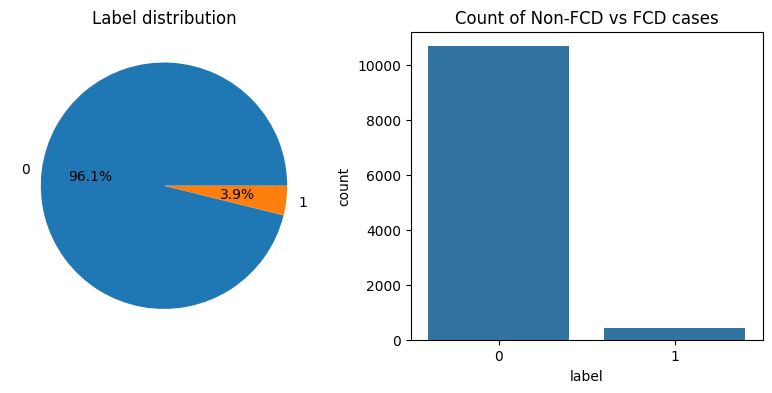

Label statistics:
label
0    10660
1      428
Name: count, dtype: int64
FCD prevalence: 0.039


In [6]:
# Label distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='label')
plt.title('Count of Non-FCD vs FCD cases')

plt.savefig('label_distribution.png', dpi=1200, bbox_inches='tight')
plt.show()

print("Label statistics:")
print(df['label'].value_counts())
print(f"FCD prevalence: {df['label'].mean():.3f}")

**Extract radiomics features**

In [7]:
all_radiomics_features = [col for col in df.columns if col not in
                         ['Subject', 'Brain area', 'volume', 'label', 'vol_label']]

print(f"Total radiomics features to analyze: {len(all_radiomics_features)}")
print(f"First 10 features: {all_radiomics_features[:10]}")

Total radiomics features to analyze: 279
First 10 features: ['original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median']


In [8]:
print(f"\nLABEL DISTRIBUTION:")
print(f"Healthy samples: {(df['label'] == 0).sum()}")
print(f"FCD samples: {(df['label'] == 1).sum()}")
print(f"Total samples: {len(df)}")
print(f"FCD prevalence: {(df['label'] == 1).mean():.3f}")


LABEL DISTRIBUTION:
Healthy samples: 10660
FCD samples: 428
Total samples: 11088
FCD prevalence: 0.039


In [9]:
def analyze_all_features_direct(df, features_list):
    results = []

    for feature in features_list:
        try:
            healthy = df[df['label'] == 0][feature]  # All healthy samples
            fcd = df[df['label'] == 1][feature]      # All FCD samples

            if len(healthy) > 1 and len(fcd) > 1:
                # Mann-Whitney U test
                stat, p_val = mannwhitneyu(healthy, fcd, alternative='two-sided')

                # Calculate effect size (rank-biserial correlation)
                n_healthy, n_fcd = len(healthy), len(fcd)
                effect_size = 1 - (2 * stat) / (n_healthy * n_fcd)

                # means and std
                mean_healthy, mean_fcd = healthy.mean(), fcd.mean()
                std_healthy, std_fcd = healthy.std(), fcd.std()

                # 95% confidence intervals
                healthy_ci = (mean_healthy - 1.96*std_healthy/np.sqrt(n_healthy),
                             mean_healthy + 1.96*std_healthy/np.sqrt(n_healthy))
                fcd_ci = (mean_fcd - 1.96*std_fcd/np.sqrt(n_fcd),
                         mean_fcd + 1.96*std_fcd/np.sqrt(n_fcd))

                results.append({
                    'feature': feature,
                    'p_value': p_val,
                    'statistic': stat,
                    'effect_size_rb': effect_size,
                    'abs_effect_size': abs(effect_size),
                    'mean_healthy': mean_healthy,
                    'mean_fcd': mean_fcd,
                    'std_healthy': std_healthy,
                    'std_fcd': std_fcd,
                    'healthy_ci_lower': healthy_ci[0],
                    'healthy_ci_upper': healthy_ci[1],
                    'fcd_ci_lower': fcd_ci[0],
                    'fcd_ci_upper': fcd_ci[1],
                    'direction': 'Higher in FCD' if mean_fcd > mean_healthy else 'Lower in FCD',
                    'n_healthy': n_healthy,
                    'n_fcd': n_fcd
                })
            else:
                print(f"Skipping {feature}: insufficient samples (Healthy: {len(healthy)}, FCD: {len(fcd)})")

        except Exception as e:
            print(f"Error processing {feature}: {e}")
            continue

    return pd.DataFrame(results)

In [10]:
all_results_df = analyze_all_features_direct(df, all_radiomics_features)

# multiple testing correction
all_results_df['p_value_adj'] = multipletests(all_results_df['p_value'], method='fdr_bh')[1]
all_results_df['significant'] = all_results_df['p_value_adj'] < 0.05
all_results_df['significance_level'] = all_results_df['p_value_adj'].apply(
    lambda x: '***' if x < 0.001 else '**' if x < 0.01 else '*' if x < 0.05 else 'NS'
)

# Sort by significance
all_results_df = all_results_df.sort_values('p_value_adj')

print(f"Significant features (FDR < 0.05): {all_results_df['significant'].sum()}")


Significant features (FDR < 0.05): 225


### Top significant features


Top 20 most significant features:
original_gldm_DependenceVariance              p_adj=0.000000 *** effect=0.253 (Higher in FCD)
original_gldm_DependenceNonUniformityNormalized p_adj=0.000000 *** effect=-0.236 (Lower in FCD)
original_gldm_LargeDependenceHighGrayLevelEmphasis_T1 p_adj=0.000000 *** effect=0.227 (Higher in FCD)
original_gldm_LargeDependenceEmphasis         p_adj=0.000000 *** effect=0.225 (Higher in FCD)
original_glrlm_ShortRunEmphasis_T2            p_adj=0.000000 *** effect=-0.224 (Lower in FCD)
original_glrlm_RunLengthNonUniformityNormalized_T2 p_adj=0.000000 *** effect=-0.225 (Lower in FCD)
original_gldm_DependenceNonUniformityNormalized_T2 p_adj=0.000000 *** effect=-0.224 (Lower in FCD)
original_glszm_LargeAreaHighGrayLevelEmphasis_T2 p_adj=0.000000 *** effect=0.222 (Higher in FCD)
original_glrlm_RunPercentage_T2               p_adj=0.000000 *** effect=-0.222 (Lower in FCD)
original_gldm_DependenceVariance_T2           p_adj=0.000000 *** effect=0.222 (Higher in FCD)
or

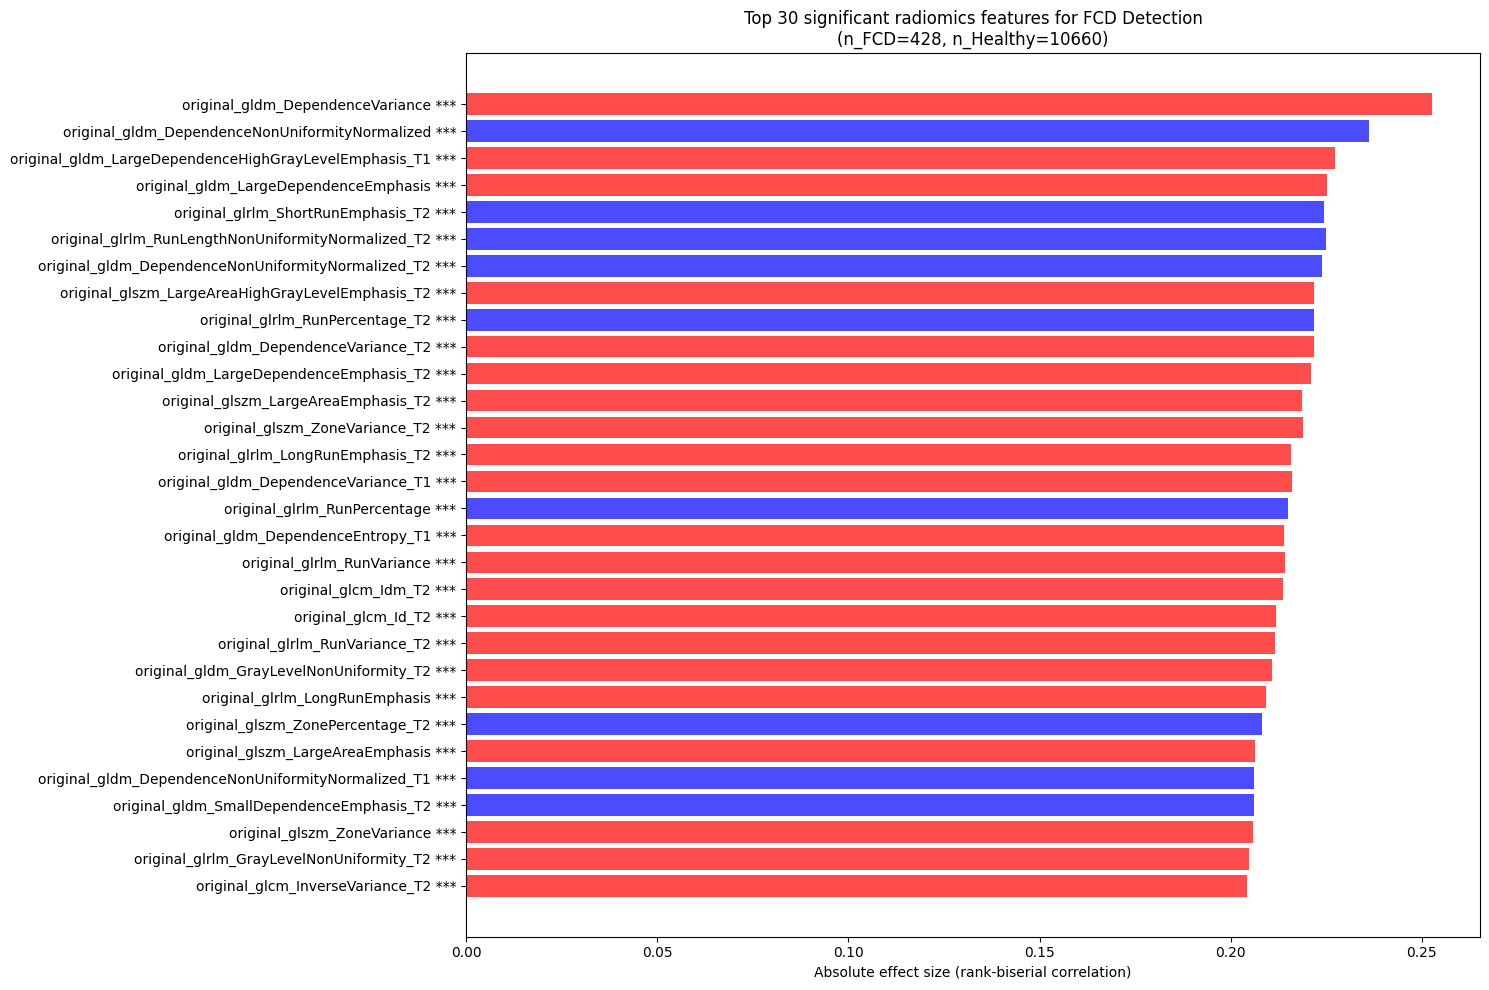

In [11]:
print("\nTop 20 most significant features:")
top_20 = all_results_df.head(20)
for idx, row in top_20.iterrows():
    print(f"{row['feature']:45} p_adj={row['p_value_adj']:.6f} {row['significance_level']} "
          f"effect={row['effect_size_rb']:.3f} ({row['direction']})")

# Create summary plots for all significant features
significant_features = all_results_df[all_results_df['significant']]

if len(significant_features) > 0:
    # Plot 1: Feature importance by effect size
    plt.figure(figsize=(15, 10))
    top_30_sig = significant_features.head(30)

    y_pos = np.arange(len(top_30_sig))
    colors = ['red' if es > 0 else 'blue' for es in top_30_sig['effect_size_rb']]

    plt.barh(y_pos, top_30_sig['abs_effect_size'], color=colors, alpha=0.7)
    plt.yticks(y_pos, [f"{feat} {sig}" for feat, sig in
                       zip(top_30_sig['feature'], top_30_sig['significance_level'])])
    plt.xlabel('Absolute effect size (rank-biserial correlation)')
    plt.title(f'Top 30 significant radiomics features for FCD Detection\n'
              f'(n_FCD={df["label"].sum()}, n_Healthy={(df["label"] == 0).sum()})')
    plt.gca().invert_yaxis()
    plt.tight_layout()

    plt.savefig('significant_radiomics_features.png', dpi=1200, bbox_inches='tight')
    plt.show()


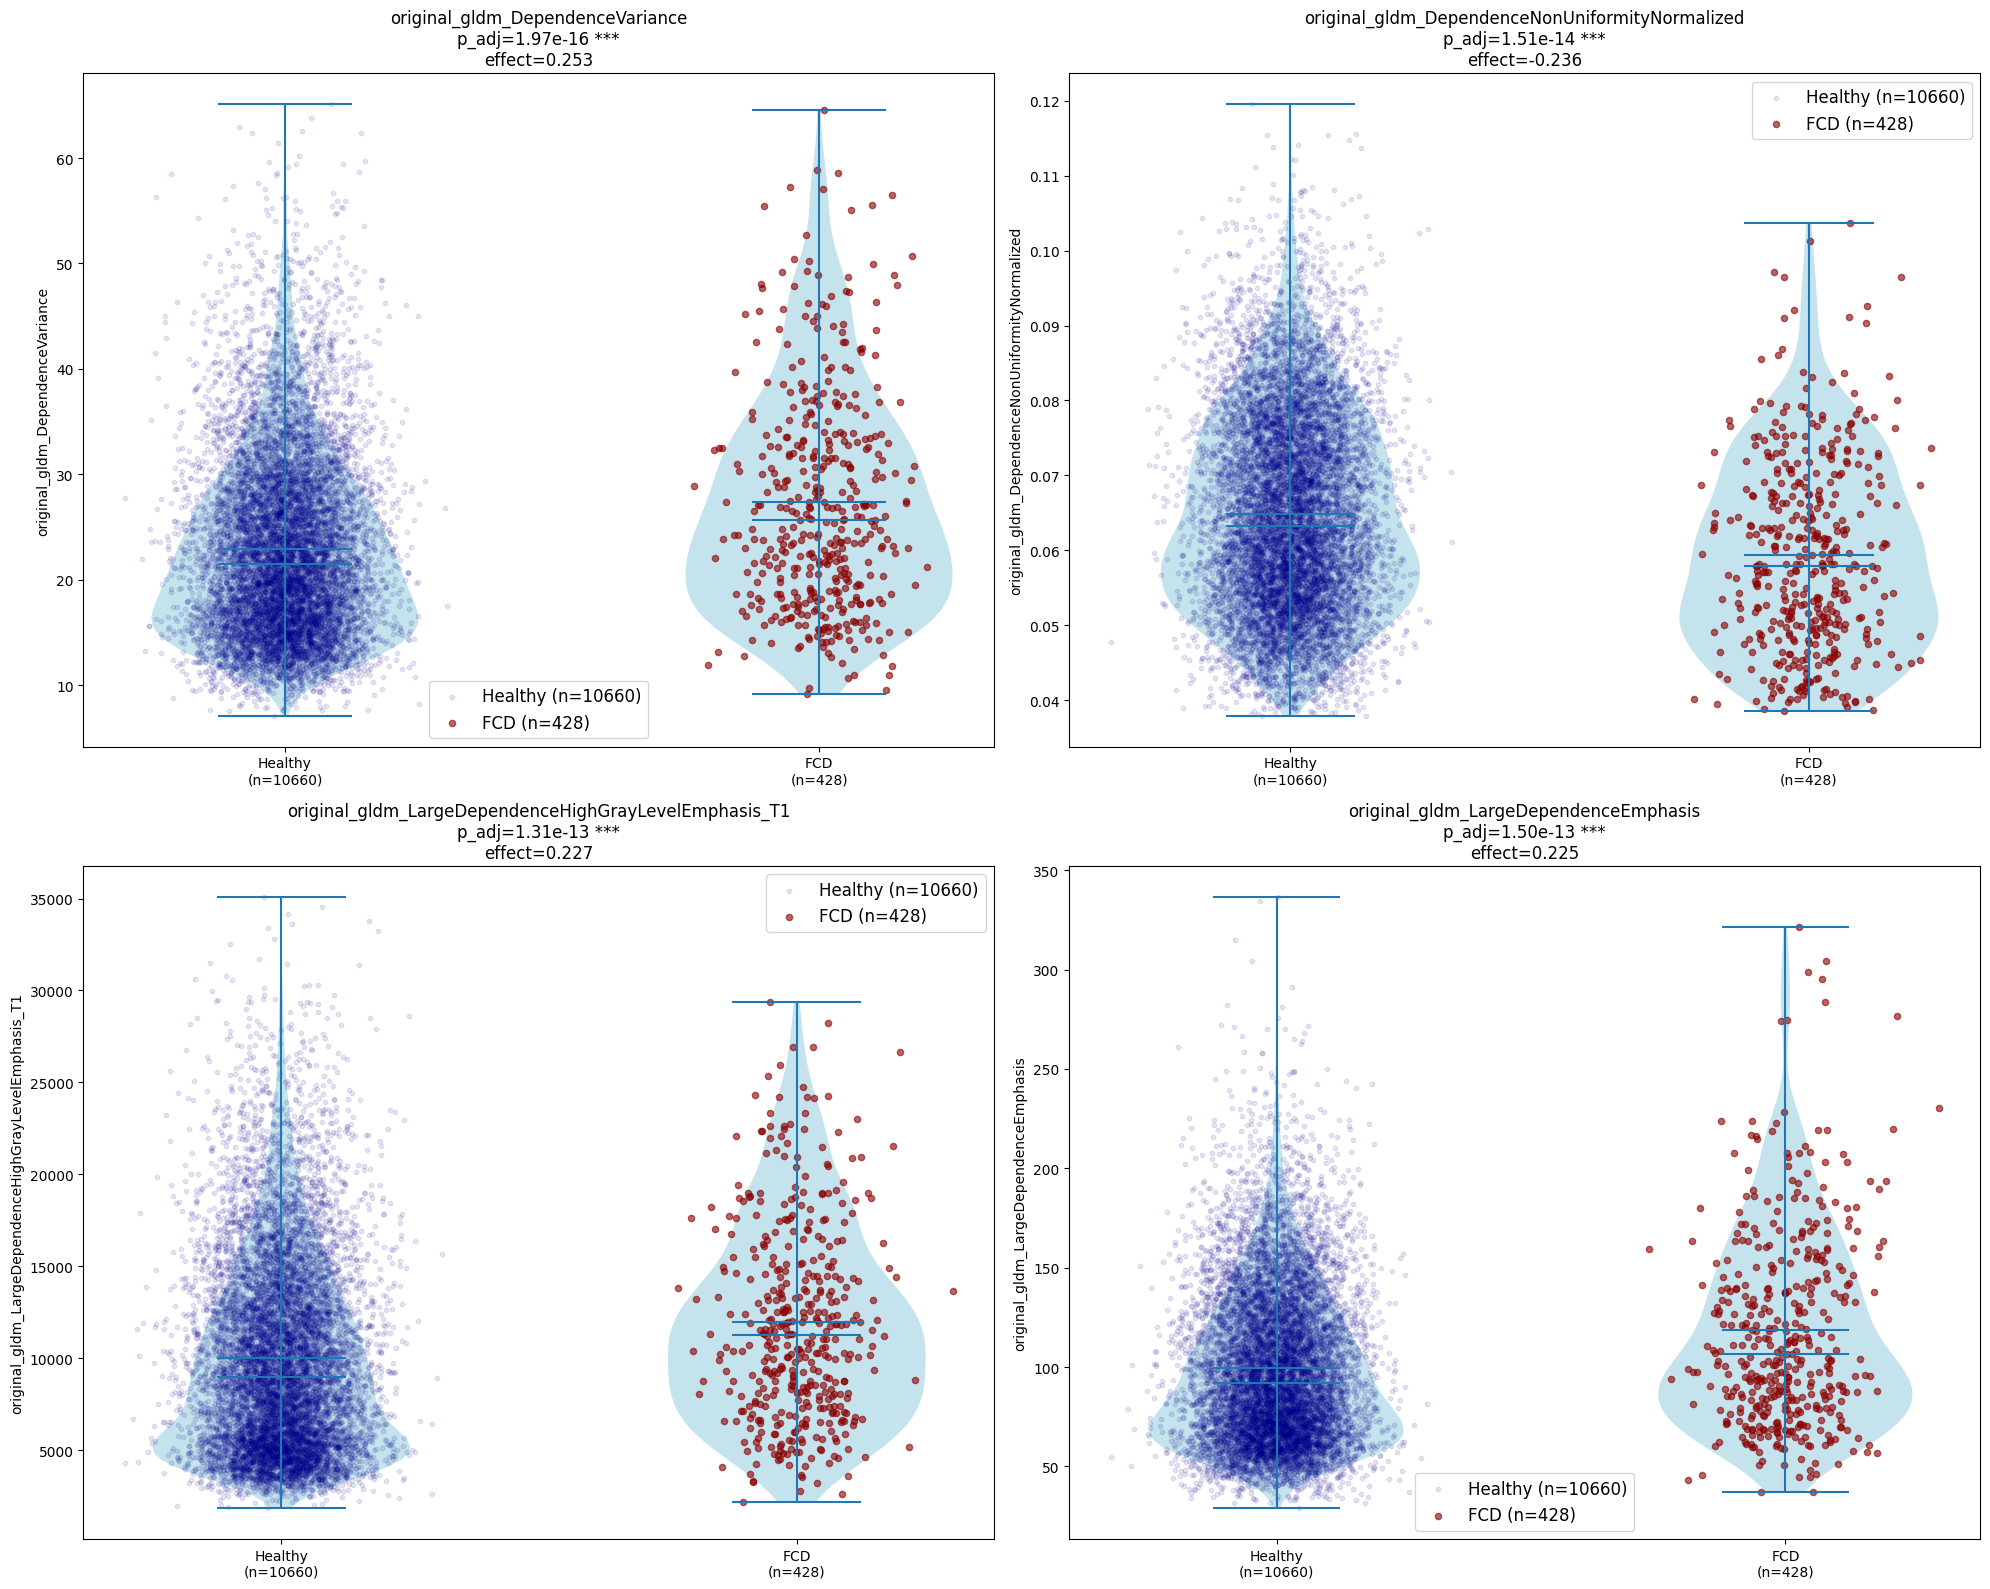

In [12]:
top_4_features = all_results_df.head(4)['feature'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

for i, feature in enumerate(top_4_features):
    if i < len(axes):

        feat_stats = all_results_df[all_results_df['feature'] == feature].iloc[0]

        # enhanced distribution plot
        data_healthy = df[df['label'] == 0][feature]  # All healthy samples
        data_fcd = df[df['label'] == 1][feature]      # All FCD samples

        # violin plot
        violin_parts = axes[i].violinplot([data_healthy, data_fcd],
                                        positions=[1, 2], showmeans=True, showmedians=True)


        for pc in violin_parts['bodies']:
            pc.set_facecolor('lightblue')
            pc.set_alpha(0.7)

        x_healthy = np.random.normal(1, 0.08, len(data_healthy))
        x_fcd = np.random.normal(2, 0.08, len(data_fcd))
        axes[i].scatter(x_healthy, data_healthy, alpha=0.1, color='darkblue', s=10, label=f'Healthy (n={len(data_healthy)})')
        axes[i].scatter(x_fcd, data_fcd, alpha=0.6, color='darkred', s=20, label=f'FCD (n={len(data_fcd)})')

        axes[i].set_xticks([1, 2])
        axes[i].set_xticklabels([f'Healthy\n(n={len(data_healthy)})', f'FCD\n(n={len(data_fcd)})'])
        axes[i].set_ylabel(feature)


        title = f'{feature}\n'
        title += f'p_adj={feat_stats["p_value_adj"]:.2e} {feat_stats["significance_level"]}\n'
        title += f'effect={feat_stats["effect_size_rb"]:.3f}'
        axes[i].set_title(title, fontsize=12)
        axes[i].legend(fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.savefig('top4_radiomics_features_violin_plots.png', dpi=1200, bbox_inches='tight')
plt.show()

### Summary

In [13]:
def generate_comprehensive_summary_direct(all_results_df, df):
    significant_features = all_results_df[all_results_df['significant']]

    summary = {
        'dataset_info': {
            'total_samples': len(df),
            'healthy_samples': (df['label'] == 0).sum(),
            'fcd_samples': (df['label'] == 1).sum(),
            'fcd_prevalence': (df['label'] == 1).mean(),
            'total_features_analyzed': len(all_results_df),
            'unique_subjects': df['Subject'].nunique(),
            'unique_brain_areas': df['Brain area'].nunique()
        },
        'significance_summary': {
            'significant_features': len(significant_features),
            'significance_rate': (len(significant_features) / len(all_results_df)) * 100,
            'very_significant_p001': len(all_results_df[all_results_df['p_value_adj'] < 0.001]),
            'highly_significant_p01': len(all_results_df[all_results_df['p_value_adj'] < 0.01]),
            'moderately_significant_p05': len(all_results_df[all_results_df['p_value_adj'] < 0.05])
        },
        'effect_size_summary': {
            'mean_effect_size': all_results_df['abs_effect_size'].mean(),
            'median_effect_size': all_results_df['abs_effect_size'].median(),
            'max_effect_size': all_results_df['abs_effect_size'].max(),
            'strong_effects_05': len(all_results_df[all_results_df['abs_effect_size'] > 0.5]),
            'moderate_effects_03': len(all_results_df[all_results_df['abs_effect_size'] > 0.3]),
            'weak_effects_01': len(all_results_df[all_results_df['abs_effect_size'] > 0.1]),
            'features_higher_in_fcd': (all_results_df['effect_size_rb'] > 0).sum(),
            'features_lower_in_fcd': (all_results_df['effect_size_rb'] < 0).sum()
        },
        'top_performers': {
            'by_p_value': all_results_df.head(10)[['feature', 'p_value_adj', 'effect_size_rb', 'direction']].to_dict('records'),
            'by_effect_size': all_results_df.nlargest(10, 'abs_effect_size')[['feature', 'p_value_adj', 'effect_size_rb', 'direction']].to_dict('records')
        }
    }

    return summary

final_summary = generate_comprehensive_summary_direct(all_results_df, df)

print("="*80)

print("\n Dataset information:")
dataset_info = final_summary['dataset_info']
print(f"  Total samples: {dataset_info['total_samples']}")
print(f"    - Healthy samples: {dataset_info['healthy_samples']}")
print(f"    - FCD samples: {dataset_info['fcd_samples']}")
print(f"  FCD prevalence: {dataset_info['fcd_prevalence']:.3f}")
print(f"  Unique subjects: {dataset_info['unique_subjects']}")
print(f"  Unique brain areas: {dataset_info['unique_brain_areas']}")
print(f"  Total features analyzed: {dataset_info['total_features_analyzed']}")

print(f"\n Significance results:")
sig_info = final_summary['significance_summary']
print(f"  Significant features (FDR < 0.05): {sig_info['significant_features']} ({sig_info['significance_rate']:.1f}%)")
print(f"  Very significant (p_adj < 0.001): {sig_info['very_significant_p001']}")
print(f"  Highly significant (p_adj < 0.01): {sig_info['highly_significant_p01']}")
print(f"  Moderately significant (p_adj < 0.05): {sig_info['moderately_significant_p05']}")

print(f"\n Effect size distribution:")
effect_info = final_summary['effect_size_summary']
print(f"  Mean absolute effect size: {effect_info['mean_effect_size']:.3f}")
print(f"  Median absolute effect size: {effect_info['median_effect_size']:.3f}")
print(f"  Maximum effect size: {effect_info['max_effect_size']:.3f}")
print(f"  Features with strong effects (>0.5): {effect_info['strong_effects_05']}")
print(f"  Features with moderate effects (>0.3): {effect_info['moderate_effects_03']}")
print(f"  Features with weak effects (>0.1): {effect_info['weak_effects_01']}")
print(f"  Features higher in FCD: {effect_info['features_higher_in_fcd']}")
print(f"  Features lower in FCD: {effect_info['features_lower_in_fcd']}")

print(f"\n Top 5 features by significance:")
for i, feat in enumerate(final_summary['top_performers']['by_p_value'][:5]):
    print(f"  {i+1}. {feat['feature']}")
    print(f"     p_adj = {feat['p_value_adj']:.2e}, effect = {feat['effect_size_rb']:.3f} ({feat['direction']})")

print(f"\n Top 5 features by effect size:")
for i, feat in enumerate(final_summary['top_performers']['by_effect_size'][:5]):
    print(f"  {i+1}. {feat['feature']}")
    print(f"     effect = {feat['effect_size_rb']:.3f}, p_adj = {feat['p_value_adj']:.2e} ({feat['direction']})")



 Dataset information:
  Total samples: 11088
    - Healthy samples: 10660
    - FCD samples: 428
  FCD prevalence: 0.039
  Unique subjects: 168
  Unique brain areas: 66
  Total features analyzed: 279

 Significance results:
  Significant features (FDR < 0.05): 225 (80.6%)
  Very significant (p_adj < 0.001): 170
  Highly significant (p_adj < 0.01): 205
  Moderately significant (p_adj < 0.05): 225

 Effect size distribution:
  Mean absolute effect size: 0.115
  Median absolute effect size: 0.112
  Maximum effect size: 0.253
  Features with strong effects (>0.5): 0
  Features with moderate effects (>0.3): 0
  Features with weak effects (>0.1): 164
  Features higher in FCD: 138
  Features lower in FCD: 141

 Top 5 features by significance:
  1. original_gldm_DependenceVariance
     p_adj = 1.97e-16, effect = 0.253 (Higher in FCD)
  2. original_gldm_DependenceNonUniformityNormalized
     p_adj = 1.51e-14, effect = -0.236 (Lower in FCD)
  3. original_gldm_LargeDependenceHighGrayLevelEmphasi

## ML

### Logistic Regression




In [14]:
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Parameters
RND = 42
TEST_SUBJ_FRAC = 0.30
NGKF_SPLITS = 5
THRESHOLDS = np.linspace(0.0, 1.0, 101)

# grid for logistic regression
C_list = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
penalty_list = ['l2', 'l1']
param_grid = [{'C': C, 'penalty': pen} for C, pen in product(C_list, penalty_list)]

# random baseline settings
baseline_rates = [0.5, 0.7, 0.8]
baseline_runs = 100

In [16]:
ID_COL = 'Subject'
LABEL_COL = 'label'
VOL_COL = 'vol_label'
VOLUME = 'volume'
BRAIN_COL = 'Brain area'

feature_cols = [c for c in df.columns if c not in (ID_COL, LABEL_COL, VOL_COL, VOLUME, BRAIN_COL)]

X_all = df[feature_cols].copy()
y_all = df[LABEL_COL].astype(int).values
subjects_all = df[ID_COL].values
volumes_all = df[VOL_COL].values

print("Total samples:", len(df))
print("Unique subjects:", len(np.unique(subjects_all)))
print("Feature count:", X_all.shape[1])
print("Label distribution (all):", np.bincount(y_all))

Total samples: 11088
Unique subjects: 168
Feature count: 279
Label distribution (all): [10660   428]


In [17]:
unique_subjects = np.array(sorted(np.unique(subjects_all)))
train_subjects, test_subjects = train_test_split(unique_subjects, test_size=TEST_SUBJ_FRAC, random_state=RND, shuffle=True)

def subject_mask(subjects, allowed_subjects):
    aset = set(allowed_subjects)
    return np.array([s in aset for s in subjects])

train_mask = subject_mask(subjects_all, train_subjects)
test_mask  = subject_mask(subjects_all, test_subjects)

X_train_df = X_all.iloc[train_mask].reset_index(drop=True)
y_train = y_all[train_mask]
groups_train = subjects_all[train_mask]

X_test_df = X_all.iloc[test_mask].reset_index(drop=True)
y_test = y_all[test_mask]
groups_test = subjects_all[test_mask]
volumes_test = volumes_all[test_mask]

print("Train subjects:", len(train_subjects), " Test subjects:", len(test_subjects))
print("Train samples:", len(y_train), " Test samples:", len(y_test))
print("Train label counts:", np.bincount(y_train))

Train subjects: 117  Test subjects: 51
Train samples: 7722  Test samples: 3366
Train label counts: [7451  271]


In [18]:
def patient_level_FN_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    fn = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() == 0:
                fn += 1
    return fn

def patient_level_recall_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    total = 0
    detected = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            total += 1
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() > 0:
                detected += 1
    return detected / total if total > 0 else np.nan

def choose_threshold_minFP_with_patientFN0(probs, y_true, subjects, thresholds=THRESHOLDS):
    best = None
    for t in thresholds:
        preds = (probs >= t).astype(int)
        pfn = patient_level_FN_strict(y_true, preds, subjects)
        fp = int(((preds == 1) & (y_true == 0)).sum())
        if pfn == 0:
            if best is None or fp < best[1] or (fp == best[1] and t < best[0]):
                best = (t, fp, pfn)
    if best is None:
        # minimize patient_FN first, then FP
        best2 = None
        for t in thresholds:
            preds = (probs >= t).astype(int)
            pfn = patient_level_FN_strict(y_true, preds, subjects)
            fp = int(((preds == 1) & (y_true == 0)).sum())
            if best2 is None or pfn < best2[2] or (pfn == best2[2] and fp < best2[1]):
                best2 = (t, fp, pfn)
        return best2
    return best

In [19]:
rus = RandomUnderSampler(random_state=RND)
scaler = StandardScaler()
gkf = GroupKFold(n_splits=NGKF_SPLITS, random_state=RND, shuffle=True)

best_score = None
best_params = None
best_model = None
best_threshold_on_cv = None
best_avg_rec_region = None

for params in param_grid:
    print("\nTesting params:", params)
    fold_fps = []
    fold_patient_fn = []
    fold_thresholds = []
    fold_recalls_region = []
    fold_recalls_patient = []
    fold_specs_region = []

    for fold_idx, (tr_idx, va_idx) in enumerate(gkf.split(X_train_df, y_train, groups_train)):
        # select fold
        X_tr = X_train_df.iloc[tr_idx].values
        y_tr = y_train[tr_idx]
        X_va = X_train_df.iloc[va_idx].values
        y_va = y_train[va_idx]
        groups_va = groups_train[va_idx]

        # scale
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_va_scaled = scaler.transform(X_va)

        # RandomUnderSampler on train fold
        X_res, y_res = rus.fit_resample(X_tr_scaled, y_tr)

        # classifier: LogisticRegression
        clf = LogisticRegression(C=params['C'], penalty=params['penalty'],
                                 solver='saga', max_iter=10000, random_state=RND, n_jobs=-1)
        clf.fit(X_res, y_res)

        # probs on validation fold
        probs = clf.predict_proba(X_va_scaled)[:, 1]

        # choose threshold that ensures strict patient_FN==0 on this fold and minimizes FP
        t, fp_fold, pfn_fold = choose_threshold_minFP_with_patientFN0(probs, y_va, groups_va, thresholds=THRESHOLDS)

        preds = (probs >= t).astype(int)

        # region-level metrics
        rec_region = recall_score(y_va, preds, zero_division=0)

        cm = confusion_matrix(y_va, preds, labels=[0,1])
        tn, fp_count, fn_count, tp_count = cm.ravel()
        spec_region = tn / (tn + fp_count) if (tn + fp_count) > 0 else np.nan  # classic specificity TN/(TN+FP)

        # patient-level (strict)
        rec_patient = patient_level_recall_strict(y_va, preds, groups_va)

        # save fold metrics
        fold_fps.append(fp_fold)
        fold_patient_fn.append(pfn_fold)
        fold_thresholds.append(t)
        fold_recalls_region.append(rec_region)
        fold_recalls_patient.append(rec_patient)
        fold_specs_region.append(spec_region)

        print(f" fold{fold_idx}: t={t:.3f}, fp={fp_fold}, pfn={pfn_fold}, rec_region={rec_region:.3f}, rec_patient={rec_patient:.3f}, spec_region={spec_region:.3f}")

    # aggregate fold metrics
    avg_fp = float(np.mean(fold_fps))
    total_patient_fn = int(np.sum(fold_patient_fn))
    avg_threshold = float(np.mean(fold_thresholds))
    avg_rec_region = float(np.nanmean(fold_recalls_region))
    avg_rec_patient = float(np.nanmean(fold_recalls_patient))
    avg_spec_region = float(np.nanmean(fold_specs_region))

    print("  avg_fp:", avg_fp,
          "total_patient_fn:", total_patient_fn,
          "avg_threshold:", round(avg_threshold,3),
          "avg_rec_region:", round(avg_rec_region,4),
          "avg_rec_patient:", round(avg_rec_patient,4),
          "avg_spec_region:", round(avg_spec_region,4))

    # selection: require strict patient_FN == 0 across folds, minimize avg_fp, tie-breaker max avg_rec_region
    tol_fp = 1e-6
    if total_patient_fn == 0:
        accept = False
        if best_score is None:
            accept = True
        else:
            if avg_fp < best_score - tol_fp:
                accept = True
            elif abs(avg_fp - best_score) <= tol_fp and avg_rec_region > best_avg_rec_region:
                accept = True
        if accept:
            best_score = avg_fp
            best_params = params
            best_threshold_on_cv = avg_threshold
            best_avg_rec_region = avg_rec_region

            # train final model on full train (scale + RandomUnderSampler)
            X_train_scaled = scaler.fit_transform(X_train_df.values)
            X_train_res, y_train_res = rus.fit_resample(X_train_scaled, y_train)
            final_clf = LogisticRegression(C=params['C'], penalty=params['penalty'],
                                           solver='saga', max_iter=10000, random_state=RND, n_jobs=-1)
            final_clf.fit(X_train_res, y_train_res)
            best_model = Pipeline([('scaler', scaler), ('clf', final_clf)])

print("BEST params:", best_params)
print("BEST avg_fp:", best_score)
print("BEST avg_rec_region:", best_avg_rec_region)
print("BEST threshold (mean from folds):", best_threshold_on_cv)



Testing params: {'C': 0.001, 'penalty': 'l2'}
 fold0: t=0.430, fp=912, pfn=0, rec_region=0.852, rec_patient=1.000, spec_region=0.404
 fold1: t=0.430, fp=1014, pfn=0, rec_region=0.898, rec_patient=1.000, spec_region=0.335
 fold2: t=0.360, fp=1193, pfn=0, rec_region=0.941, rec_patient=1.000, spec_region=0.177
 fold3: t=0.340, fp=1126, pfn=0, rec_region=0.979, rec_patient=1.000, spec_region=0.234
 fold4: t=0.480, fp=629, pfn=0, rec_region=0.833, rec_patient=1.000, spec_region=0.574
  avg_fp: 974.8 total_patient_fn: 0 avg_threshold: 0.408 avg_rec_region: 0.9008 avg_rec_patient: 1.0 avg_spec_region: 0.3448

Testing params: {'C': 0.001, 'penalty': 'l1'}
 fold0: t=0.000, fp=1530, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold1: t=0.000, fp=1525, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold2: t=0.000, fp=1450, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold3: t=0.000, fp=1470, pfn=0, rec_region=1.000, rec_patient=1.000, spec_regi

#### Evaluation on TEST:

In [20]:
scaler_final = best_model.named_steps['scaler']
clf_final = best_model.named_steps['clf']

X_test_scaled = scaler_final.transform(X_test_df.values)
probs_test = clf_final.predict_proba(X_test_scaled)[:, 1]
pred_test = (probs_test >= best_threshold_on_cv).astype(int)

cm_test = confusion_matrix(y_test, pred_test, labels=[0,1])
tn, fp, fn, tp = cm_test.ravel()
region_recall = recall_score(y_test, pred_test, zero_division=0)
region_precision = precision_score(y_test, pred_test, zero_division=0)
region_f1 = f1_score(y_test, pred_test, zero_division=0)
region_specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan  # TN/(TN+FP)

percentage_of_detected_volume = volumes_test[(y_test==1)&(pred_test==1)].sum()/volumes_test[(y_test==1)].sum()
p_rec_strict = patient_level_recall_strict(y_test, pred_test, groups_test)
pfn_strict = patient_level_FN_strict(y_test, pred_test, groups_test)

print("\n TEST results for best_model")
print(f"Region: TP={tp}, FP={fp}, FN={fn}, TN={tn}")
print(f"region_precision={region_precision:.3f}, region_recall={region_recall:.3f}, region_f1={region_f1:.3f}, region_specificity={region_specificity:.3f}")
print(f"patient_recall_strict={p_rec_strict:.3f}, patient_FN_strict={pfn_strict}")
print(f'detected_volume={percentage_of_detected_volume:.3f}')

results_df = pd.DataFrame({
    "true_label": y_test,
    "predicted_label": pred_test,
    "predicted_prob": probs_test,
})


results_df.to_csv("predictions_log_reg_test.csv", index=False)



 TEST results for best_model
Region: TP=142, FP=1988, FN=15, TN=1221
region_precision=0.067, region_recall=0.904, region_f1=0.124, region_specificity=0.380
patient_recall_strict=0.941, patient_FN_strict=3
detected_volume=0.954


#### Random baseline:

In [21]:
def evaluate_random_baseline(positive_rate, y_true, subjects, seed=42):
    rng = np.random.default_rng(seed)
    n_samples = len(y_true)
    n_positive = int(n_samples * positive_rate)

    # Random predictions
    random_preds = np.zeros(n_samples)
    positive_indices = rng.choice(n_samples, size=n_positive, replace=False)
    random_preds[positive_indices] = 1

    # Region-level metrics
    tn, fp, fn, tp = confusion_matrix(y_true, random_preds).ravel()
    recall_region = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity_region = tn / (fp + tn) if (fp + tn) > 0 else 0
    precision_region = precision_score(y_true, random_preds, zero_division=0)
    f1_region = f1_score(y_true, random_preds, zero_division=0)

    # Patient-level recall
    recall_patient = patient_level_recall_strict(y_true, random_preds, subjects)

    print(f"\n Random baseline (positive_rate={positive_rate:.2f}):")
    print(f" TP={tp}, FP={fp}, FN={fn}, TN={tn}")
    print(f" Region recall: {recall_region:.3f}")
    print(f" Region specificity: {specificity_region:.3f}")
    print(f" Region precision: {precision_region:.3f}")
    print(f" Region F1: {f1_region:.3f}")
    print(f" Patient recall: {recall_patient:.3f}")

    return {
        "positive_rate": positive_rate,
        "region_recall": recall_region,
        "region_specificity": specificity_region,
        "region_precision": precision_region,
        "region_f1": f1_region,
        "patient_recall": recall_patient,
        "TP": tp, "FP": fp, "FN": fn, "TN": tn
    }

In [22]:
results_random_80 = evaluate_random_baseline(0.8, y_test, groups_test)


 Random baseline (positive_rate=0.80):
 TP=125, FP=2567, FN=32, TN=642
 Region recall: 0.796
 Region specificity: 0.200
 Region precision: 0.046
 Region F1: 0.088
 Patient recall: 0.961


#### Feature Importance

In [23]:
scaler_final = best_model.named_steps['scaler']
clf_final = best_model.named_steps['clf']

coefs = clf_final.coef_.ravel()


feat_importance = pd.DataFrame({
    "feature": X_train_df.columns,
    "coefficient": coefs,
    "abs_coeff": np.abs(coefs)
}).sort_values("abs_coeff", ascending=False)

feat_importance.to_csv("feature_importance_LogReg.csv", index=False)

print(feat_importance.head(10))



                                          feature  coefficient  abs_coeff
79        original_glszm_LowGrayLevelZoneEmphasis     0.125361   0.125361
84   original_glszm_SmallAreaLowGrayLevelEmphasis     0.121247   0.121247
37                              original_glcm_MCC     0.109970   0.109970
228            original_gldm_DependenceEntropy_T2     0.108482   0.108482
278                    original_ngtdm_Strength_T2    -0.105870   0.105870
135            original_gldm_DependenceEntropy_T1     0.098219   0.098219
11                      original_firstorder_Range     0.096913   0.096913
6                     original_firstorder_Maximum     0.091482   0.091482
32                             original_glcm_Imc2     0.084872   0.084872
200               original_firstorder_Skewness_T2     0.084082   0.084082


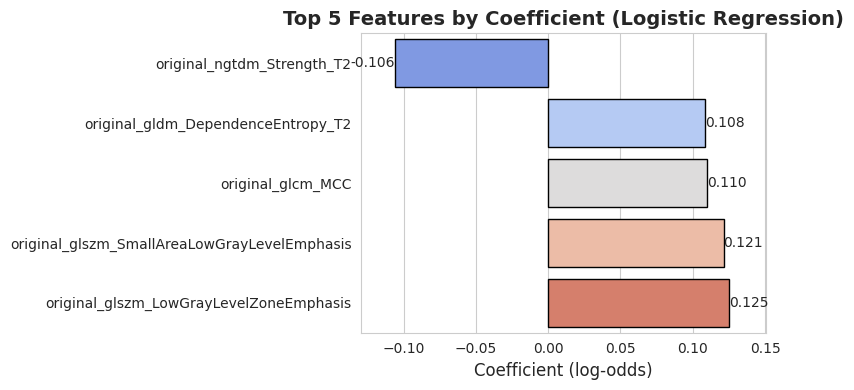

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 20
top_df = feat_importance.head(TOP_N).iloc[::-1]

plt.figure(figsize=(8, max(4, 0.3 * TOP_N)))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='coefficient',
    y='feature',
    data=top_df,
    palette='coolwarm',
    edgecolor='black'
)


for i, coef in enumerate(top_df['coefficient']):
    ax.text(coef, i, f"{coef:.3f}", va='center', fontsize=10,
            ha='left' if coef >= 0 else 'right')

ax.set_xlabel("Coefficient (log-odds)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Coefficient (Logistic Regression)", fontsize=14, weight='bold')

xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin - 0.1*abs(xmin), xmax + 0.1*abs(xmax))

plt.tight_layout()
plt.savefig("top_features_coef_log_reg.png", dpi=600)
plt.show()



In [25]:
from sklearn.inspection import permutation_importance

X_test_scaled = scaler_final.transform(X_test_df.values)
r = permutation_importance(clf_final, X_test_scaled, y_test,
                           scoring='roc_auc', n_repeats=10, random_state=RND, n_jobs=-1)

feat_importance_perm = pd.DataFrame({
    'feature': X_test_df.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values('importance_mean', ascending=False)

feat_importance_perm.to_csv("feature_importance_LogReg_permutation.csv", index=False)
print(feat_importance_perm.head(10))


                                          feature  importance_mean  \
79        original_glszm_LowGrayLevelZoneEmphasis         0.016159   
84   original_glszm_SmallAreaLowGrayLevelEmphasis         0.012053   
37                              original_glcm_MCC         0.012018   
31                             original_glcm_Imc1         0.007323   
14                   original_firstorder_Skewness         0.006443   
278                    original_ngtdm_Strength_T2         0.005956   
68                     original_glrlm_RunVariance         0.005062   
60                 original_glrlm_LongRunEmphasis         0.004791   
178                 original_glszm_ZoneEntropy_T1         0.004390   
197                  original_firstorder_Range_T2         0.004258   

     importance_std  
79         0.002947  
84         0.002507  
37         0.004008  
31         0.003009  
14         0.003669  
278        0.004113  
68         0.001171  
60         0.001214  
178        0.002324  
197      

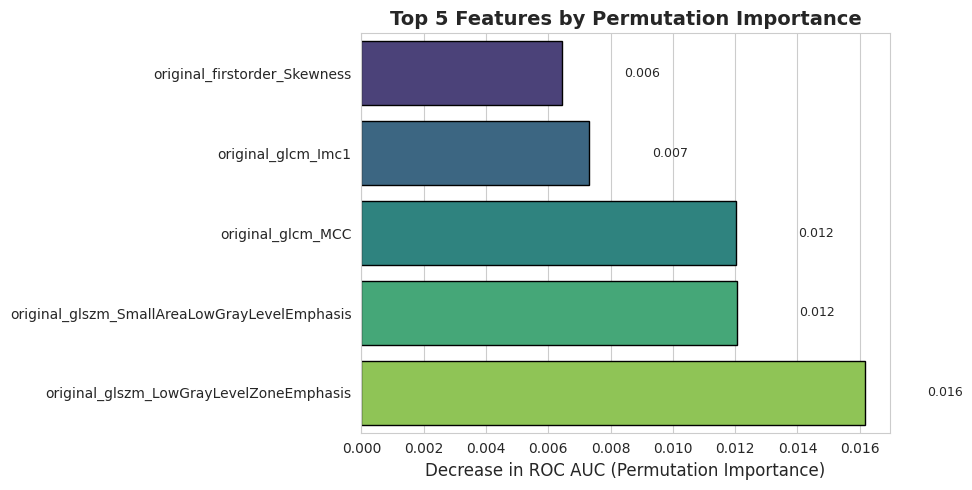

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 20
top_perm_plot = feat_importance_perm.head(TOP_N).iloc[::-1]

plt.figure(figsize=(10, max(5, 0.3 * TOP_N)))
sns.set_style("whitegrid")


ax = sns.barplot(
    x='importance_mean',
    y='feature',
    data=top_perm_plot,
    palette='viridis',
    edgecolor='black',
    ci=None
)

for i, (value) in enumerate(top_perm_plot['importance_mean']):
    ax.text(value + 0.002, i, f"{value:.3f}", va='center', fontsize=9)

ax.set_xlabel("Decrease in ROC AUC (Permutation Importance)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Permutation Importance", fontsize=14, weight='bold')

plt.tight_layout()
plt.savefig("top_features_perm_imp_log_reg.png", dpi=600)
plt.show()

#### ROC AUC

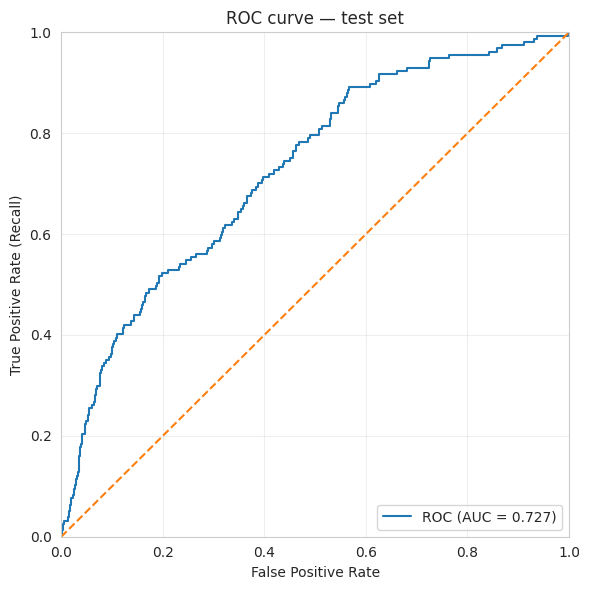

In [30]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GroupKFold
from sklearn.base import clone

probs_test = best_model.predict_proba(X_test_df.values)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve — test set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("roc_test_set_log_reg.png", dpi=600)
plt.show()


### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

RND = 42
TEST_SUBJ_FRAC = 0.30
NGKF_SPLITS = 5
THRESHOLDS = np.linspace(0.0, 1.0, 101)

# grid for KNN
n_neighbors_list = [3, 5, 7, 10, 20, 30, 50]
weights_list = ['uniform', 'distance']
p_list = [1, 2]  # p=1 -> Manhattan, p=2 -> Euclidean
param_grid = [{'n_neighbors': k, 'weights': w, 'p': p}
              for k, w, p in product(n_neighbors_list, weights_list, p_list)]

baseline_rates = [0.5, 0.7, 0.8]
baseline_runs = 100


In [32]:
ID_COL = 'Subject'
LABEL_COL = 'label'
VOL_COL = 'vol_label'
VOLUME = 'volume'
BRAIN_COL = 'Brain area'

feature_cols = [c for c in df.columns if c not in (ID_COL, LABEL_COL, VOL_COL, VOLUME, BRAIN_COL)]

X_all = df[feature_cols].copy()
y_all = df[LABEL_COL].astype(int).values
subjects_all = df[ID_COL].values

print("Total samples:", len(df))
print("Unique subjects:", len(np.unique(subjects_all)))
print("Feature count:", X_all.shape[1])
print("Label distribution (all):", np.bincount(y_all))

unique_subjects = np.array(sorted(np.unique(subjects_all)))
train_subjects, test_subjects = train_test_split(unique_subjects, test_size=TEST_SUBJ_FRAC, random_state=RND, shuffle=True)

def subject_mask(subjects, allowed_subjects):
    aset = set(allowed_subjects)
    return np.array([s in aset for s in subjects])

train_mask = subject_mask(subjects_all, train_subjects)
test_mask  = subject_mask(subjects_all, test_subjects)

X_train_df = X_all.iloc[train_mask].reset_index(drop=True)
y_train = y_all[train_mask]
groups_train = subjects_all[train_mask]

X_test_df = X_all.iloc[test_mask].reset_index(drop=True)
y_test = y_all[test_mask]
groups_test = subjects_all[test_mask]

print("Train subjects:", len(train_subjects), " Test subjects:", len(test_subjects))
print("Train samples:", len(y_train), " Test samples:", len(y_test))
print("Train label counts:", np.bincount(y_train))

Total samples: 11088
Unique subjects: 168
Feature count: 279
Label distribution (all): [10660   428]
Train subjects: 117  Test subjects: 51
Train samples: 7722  Test samples: 3366
Train label counts: [7451  271]


In [ ]:
def patient_level_FN_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    fn = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() == 0:
                fn += 1
    return fn

def patient_level_recall_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    total = 0
    detected = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            total += 1
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() > 0:
                detected += 1
    return detected / total if total > 0 else np.nan

def choose_threshold_minFP_with_patientFN0(probs, y_true, subjects, thresholds=THRESHOLDS):
    best = None
    for t in thresholds:
        preds = (probs >= t).astype(int)
        pfn = patient_level_FN_strict(y_true, preds, subjects)
        fp = int(((preds == 1) & (y_true == 0)).sum())
        if pfn == 0:
            if best is None or fp < best[1] or (fp == best[1] and t < best[0]):
                best = (t, fp, pfn)
    if best is None:
        # minimize patient_FN first, then FP
        best2 = None
        for t in thresholds:
            preds = (probs >= t).astype(int)
            pfn = patient_level_FN_strict(y_true, preds, subjects)
            fp = int(((preds == 1) & (y_true == 0)).sum())
            if best2 is None or pfn < best2[2] or (pfn == best2[2] and fp < best2[1]):
                best2 = (t, fp, pfn)
        return best2
    return best

In [ ]:
rus = RandomUnderSampler(random_state=RND)
scaler = StandardScaler()
gkf = GroupKFold(n_splits=NGKF_SPLITS, random_state=RND, shuffle=True)

best_score = None
best_params = None
best_model = None
best_threshold_on_cv = None
best_avg_rec_region = None

for params in param_grid:
    print("\nTesting params:", params)
    fold_fps = []
    fold_patient_fn = []
    fold_thresholds = []
    fold_recalls_region = []
    fold_recalls_patient = []
    fold_specs_region = []

    for fold_idx, (tr_idx, va_idx) in enumerate(gkf.split(X_train_df, y_train, groups_train)):
        # select fold
        X_tr = X_train_df.iloc[tr_idx].values
        y_tr = y_train[tr_idx]
        X_va = X_train_df.iloc[va_idx].values
        y_va = y_train[va_idx]
        groups_va = groups_train[va_idx]

        # scale
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_va_scaled = scaler.transform(X_va)

        # RandomUnderSampler on train fold
        X_res, y_res = rus.fit_resample(X_tr_scaled, y_tr)

        # classifier: KNeighborsClassifier
        clf = KNeighborsClassifier(n_neighbors=params['n_neighbors'],
                                   weights=params['weights'],
                                   p=params['p'],
                                   n_jobs=-1)
        clf.fit(X_res, y_res)

        # probs on validation fold (KNN поддерживает predict_proba)
        probs = clf.predict_proba(X_va_scaled)[:, 1]

        # choose threshold that ensures strict patient_FN==0 on this fold and minimizes FP
        t, fp_fold, pfn_fold = choose_threshold_minFP_with_patientFN0(probs, y_va, groups_va, thresholds=THRESHOLDS)

        preds = (probs >= t).astype(int)

        # region-level metrics
        rec_region = recall_score(y_va, preds, zero_division=0)

        cm = confusion_matrix(y_va, preds, labels=[0,1])
        tn, fp_count, fn_count, tp_count = cm.ravel()
        spec_region = tn / (tn + fp_count) if (tn + fp_count) > 0 else np.nan  # classic specificity TN/(TN+FP)

        # patient-level (strict)
        rec_patient = patient_level_recall_strict(y_va, preds, groups_va)

        # save fold metrics
        fold_fps.append(fp_fold)
        fold_patient_fn.append(pfn_fold)
        fold_thresholds.append(t)
        fold_recalls_region.append(rec_region)
        fold_recalls_patient.append(rec_patient)
        fold_specs_region.append(spec_region)

        print(f" fold{fold_idx}: t={t:.3f}, fp={fp_fold}, pfn={pfn_fold}, rec_region={rec_region:.3f}, rec_patient={rec_patient:.3f}, spec_region={spec_region:.3f}")

    # aggregate fold metrics
    avg_fp = float(np.mean(fold_fps))
    total_patient_fn = int(np.sum(fold_patient_fn))
    avg_threshold = float(np.mean(fold_thresholds))
    avg_rec_region = float(np.nanmean(fold_recalls_region))
    avg_rec_patient = float(np.nanmean(fold_recalls_patient))
    avg_spec_region = float(np.nanmean(fold_specs_region))

    print("  avg_fp:", avg_fp,
          "total_patient_fn:", total_patient_fn,
          "avg_threshold:", round(avg_threshold,3),
          "avg_rec_region:", round(avg_rec_region,4),
          "avg_rec_patient:", round(avg_rec_patient,4),
          "avg_spec_region:", round(avg_spec_region,4))

    # selection: require strict patient_FN == 0 across folds, minimize avg_fp, tie-breaker max avg_rec_region
    tol_fp = 1e-6
    if total_patient_fn == 0:
        accept = False
        if best_score is None:
            accept = True
        else:
            if avg_fp < best_score - tol_fp:
                accept = True
            elif abs(avg_fp - best_score) <= tol_fp and avg_rec_region > best_avg_rec_region:
                accept = True
        if accept:
            best_score = avg_fp
            best_params = params
            best_threshold_on_cv = avg_threshold
            best_avg_rec_region = avg_rec_region

            # train final model on full train (scale + RandomUnderSampler)
            X_train_scaled = scaler.fit_transform(X_train_df.values)
            X_train_res, y_train_res = rus.fit_resample(X_train_scaled, y_train)
            final_clf = KNeighborsClassifier(n_neighbors=params['n_neighbors'],
                                             weights=params['weights'],
                                             p=params['p'],
                                             n_jobs=-1)
            final_clf.fit(X_train_res, y_train_res)
            best_model = Pipeline([('scaler', scaler), ('clf', final_clf)])

print("BEST params:", best_params)
print("BEST avg_fp:", best_score)
print("BEST avg_rec_region:", best_avg_rec_region)
print("BEST threshold (mean from folds):", best_threshold_on_cv)


Testing params: {'n_neighbors': 3, 'weights': 'uniform', 'p': 1}
 fold0: t=0.010, fp=1129, pfn=0, rec_region=0.926, rec_patient=1.000, spec_region=0.262
 fold1: t=0.000, fp=1525, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold2: t=0.340, fp=669, pfn=0, rec_region=0.603, rec_patient=1.000, spec_region=0.539
 fold3: t=0.000, fp=1470, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold4: t=0.000, fp=1476, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
  avg_fp: 1253.8 total_patient_fn: 0 avg_threshold: 0.07 avg_rec_region: 0.9058 avg_rec_patient: 1.0 avg_spec_region: 0.1601

Testing params: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2}
 fold0: t=0.010, fp=1138, pfn=0, rec_region=0.907, rec_patient=1.000, spec_region=0.256
 fold1: t=0.000, fp=1525, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold2: t=0.340, fp=694, pfn=0, rec_region=0.632, rec_patient=1.000, spec_region=0.521
 fold3: t=0.000, fp=1470, pfn=0, rec_regi

#### Evaluation on TEST

In [ ]:
scaler_final = best_model.named_steps['scaler']
clf_final = best_model.named_steps['clf']

X_test_scaled = scaler_final.transform(X_test_df.values)
probs_test = clf_final.predict_proba(X_test_scaled)[:, 1]
pred_test = (probs_test >= best_threshold_on_cv).astype(int)

cm_test = confusion_matrix(y_test, pred_test, labels=[0,1])
tn, fp, fn, tp = cm_test.ravel()
region_recall = recall_score(y_test, pred_test, zero_division=0)
region_precision = precision_score(y_test, pred_test, zero_division=0)
region_f1 = f1_score(y_test, pred_test, zero_division=0)
region_specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan  # TN/(TN+FP)

p_rec_strict = patient_level_recall_strict(y_test, pred_test, groups_test)
pfn_strict = patient_level_FN_strict(y_test, pred_test, groups_test)

print("\n TEST results for best_model")
print(f"Region: TP={tp}, FP={fp}, FN={fn}, TN={tn}")
print(f"region_precision={region_precision:.3f}, region_recall={region_recall:.3f}, region_f1={region_f1:.3f}, region_specificity={region_specificity:.3f}")
print(f"patient_recall_strict={p_rec_strict:.3f}, patient_FN_strict={pfn_strict}")

results_df = pd.DataFrame({
    "true_label": y_test,
    "predicted_label": pred_test,
    "predicted_prob": probs_test,
})


results_df.to_csv("predictions_KNN_test.csv", index=False)



 TEST results for best_model
Region: TP=118, FP=1867, FN=39, TN=1342
region_precision=0.059, region_recall=0.752, region_f1=0.110, region_specificity=0.418
patient_recall_strict=0.922, patient_FN_strict=4


#### Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

X_test_scaled = scaler_final.transform(X_test_df.values)
r = permutation_importance(clf_final, X_test_scaled, y_test,
                           scoring='roc_auc', n_repeats=10, random_state=RND, n_jobs=-1)

feat_importance_perm = pd.DataFrame({
    'feature': X_test_df.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values('importance_mean', ascending=False)

feat_importance_perm.to_csv("feature_importance_KNN_permutation.csv", index=False)
print(feat_importance_perm.head(10))

                                               feature  importance_mean  \
68                          original_glrlm_RunVariance         0.001811   
49               original_gldm_LargeDependenceEmphasis         0.001628   
60                      original_glrlm_LongRunEmphasis         0.001505   
45                    original_gldm_DependenceVariance         0.001394   
76                    original_glszm_LargeAreaEmphasis         0.001138   
87                         original_glszm_ZoneVariance         0.001065   
67                        original_glrlm_RunPercentage         0.001021   
14                        original_firstorder_Skewness         0.000907   
46                original_gldm_GrayLevelNonUniformity         0.000710   
137  original_gldm_DependenceNonUniformityNormalize...         0.000657   

     importance_std  
68         0.000770  
49         0.000751  
60         0.000726  
45         0.001117  
76         0.000993  
87         0.001001  
67         0.000820 

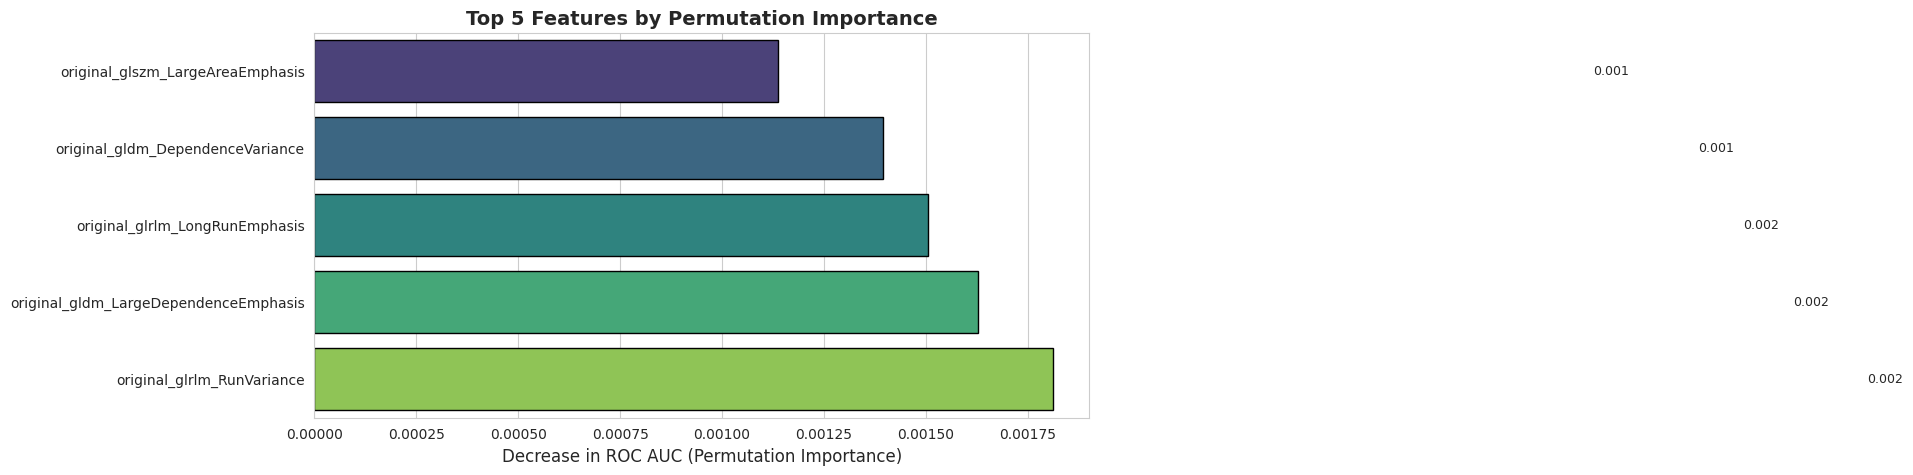

In [ ]:
TOP_N = 5
top_perm_plot = feat_importance_perm.head(TOP_N).iloc[::-1]

plt.figure(figsize=(10, max(5, 0.3 * TOP_N)))
sns.set_style("whitegrid")


ax = sns.barplot(
    x='importance_mean',
    y='feature',
    data=top_perm_plot,
    palette='viridis',
    edgecolor='black',
    ci=None
)

for i, (value) in enumerate(top_perm_plot['importance_mean']):
    ax.text(value + 0.002, i, f"{value:.3f}", va='center', fontsize=9)

ax.set_xlabel("Decrease in ROC AUC (Permutation Importance)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Permutation Importance", fontsize=14, weight='bold')

plt.tight_layout()
plt.savefig("top_features_perm_imp_KNN.png", dpi=600)
plt.show()


#### ROC AUC

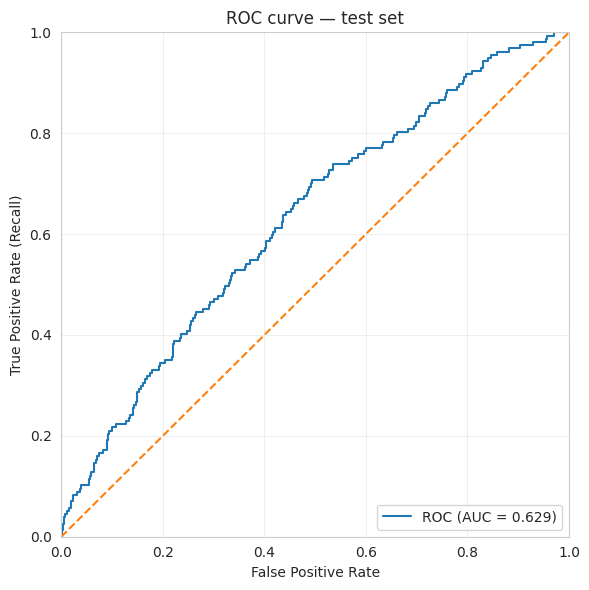

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GroupKFold
from sklearn.base import clone

probs_test = best_model.predict_proba(X_test_df.values)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve — test set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("roc_test_set_KNN.png", dpi=600)
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC
from itertools import product

# Parameters
RND = 42
TEST_SUBJ_FRAC = 0.30
NGKF_SPLITS = 5
THRESHOLDS = np.linspace(0.0, 1.0, 101)

# grid for SVM
C_list = [0.001, 0.01, 0.1, 1, 10, 100]
kernel_list = ['linear', 'rbf']
gamma_list = ['scale', 'auto']
param_grid = [{'C': C, 'kernel': ker, 'gamma': g}
              for C, ker, g in product(C_list, kernel_list, gamma_list)]

# random baseline settings
baseline_rates = [0.5, 0.7, 0.8]
baseline_runs = 100

In [ ]:
ID_COL = 'Subject'
LABEL_COL = 'label'
VOL_COL = 'vol_label'
VOLUME = 'volume'
BRAIN_COL = 'Brain area'

feature_cols = [c for c in df.columns if c not in (ID_COL, LABEL_COL, VOL_COL, VOLUME, BRAIN_COL)]

X_all = df[feature_cols].copy()
y_all = df[LABEL_COL].astype(int).values
subjects_all = df[ID_COL].values

print("Total samples:", len(df))
print("Unique subjects:", len(np.unique(subjects_all)))
print("Feature count:", X_all.shape[1])
print("Label distribution (all):", np.bincount(y_all))

Total samples: 11088
Unique subjects: 168
Feature count: 279
Label distribution (all): [10660   428]


In [ ]:
unique_subjects = np.array(sorted(np.unique(subjects_all)))
train_subjects, test_subjects = train_test_split(unique_subjects, test_size=TEST_SUBJ_FRAC, random_state=RND, shuffle=True)

def subject_mask(subjects, allowed_subjects):
    aset = set(allowed_subjects)
    return np.array([s in aset for s in subjects])

train_mask = subject_mask(subjects_all, train_subjects)
test_mask  = subject_mask(subjects_all, test_subjects)

X_train_df = X_all.iloc[train_mask].reset_index(drop=True)
y_train = y_all[train_mask]
groups_train = subjects_all[train_mask]

X_test_df = X_all.iloc[test_mask].reset_index(drop=True)
y_test = y_all[test_mask]
groups_test = subjects_all[test_mask]

print("Train subjects:", len(train_subjects), " Test subjects:", len(test_subjects))
print("Train samples:", len(y_train), " Test samples:", len(y_test))
print("Train label counts:", np.bincount(y_train))

Train subjects: 117  Test subjects: 51
Train samples: 7722  Test samples: 3366
Train label counts: [7451  271]


In [ ]:
def patient_level_FN_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    fn = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() == 0:
                fn += 1
    return fn

def patient_level_recall_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    total = 0
    detected = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            total += 1
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() > 0:
                detected += 1
    return detected / total if total > 0 else np.nan

def choose_threshold_minFP_with_patientFN0(probs, y_true, subjects, thresholds=THRESHOLDS):
    best = None
    for t in thresholds:
        preds = (probs >= t).astype(int)
        pfn = patient_level_FN_strict(y_true, preds, subjects)
        fp = int(((preds == 1) & (y_true == 0)).sum())
        if pfn == 0:
            if best is None or fp < best[1] or (fp == best[1] and t < best[0]):
                best = (t, fp, pfn)
    if best is None:
        # minimize patient_FN first, then FP
        best2 = None
        for t in thresholds:
            preds = (probs >= t).astype(int)
            pfn = patient_level_FN_strict(y_true, preds, subjects)
            fp = int(((preds == 1) & (y_true == 0)).sum())
            if best2 is None or pfn < best2[2] or (pfn == best2[2] and fp < best2[1]):
                best2 = (t, fp, pfn)
        return best2
    return best

In [ ]:
rus = RandomUnderSampler(random_state=RND)
scaler = StandardScaler()
gkf = GroupKFold(n_splits=NGKF_SPLITS, random_state=RND, shuffle=True)

best_score = None
best_params = None
best_model = None
best_threshold_on_cv = None
best_avg_rec_region = None

for params in param_grid:
    print("\nTesting params:", params)
    fold_fps = []
    fold_patient_fn = []
    fold_thresholds = []
    fold_recalls_region = []
    fold_recalls_patient = []
    fold_specs_region = []

    for fold_idx, (tr_idx, va_idx) in enumerate(gkf.split(X_train_df, y_train, groups_train)):
        # select fold
        X_tr = X_train_df.iloc[tr_idx].values
        y_tr = y_train[tr_idx]
        X_va = X_train_df.iloc[va_idx].values
        y_va = y_train[va_idx]
        groups_va = groups_train[va_idx]

        # scale
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_va_scaled = scaler.transform(X_va)

        # RandomUnderSampler on train fold
        X_res, y_res = rus.fit_resample(X_tr_scaled, y_tr)

        # classifier: SVM (SVC) with probability estimates
        clf = SVC(C=params['C'],
                  kernel=params['kernel'],
                  gamma=params['gamma'],
                  probability=True,    # нужно для predict_proba
                  random_state=RND)
        clf.fit(X_res, y_res)

        # probs on validation fold
        probs = clf.predict_proba(X_va_scaled)[:, 1]

        # choose threshold that ensures strict patient_FN==0 on this fold and minimizes FP
        t, fp_fold, pfn_fold = choose_threshold_minFP_with_patientFN0(probs, y_va, groups_va, thresholds=THRESHOLDS)

        preds = (probs >= t).astype(int)

        # region-level metrics
        rec_region = recall_score(y_va, preds, zero_division=0)

        cm = confusion_matrix(y_va, preds, labels=[0,1])
        tn, fp_count, fn_count, tp_count = cm.ravel()
        spec_region = tn / (tn + fp_count) if (tn + fp_count) > 0 else np.nan  # classic specificity TN/(TN+FP)

        # patient-level (strict)
        rec_patient = patient_level_recall_strict(y_va, preds, groups_va)

        # save fold metrics
        fold_fps.append(fp_fold)
        fold_patient_fn.append(pfn_fold)
        fold_thresholds.append(t)
        fold_recalls_region.append(rec_region)
        fold_recalls_patient.append(rec_patient)
        fold_specs_region.append(spec_region)

        print(f" fold{fold_idx}: t={t:.3f}, fp={fp_fold}, pfn={pfn_fold}, rec_region={rec_region:.3f}, rec_patient={rec_patient:.3f}, spec_region={spec_region:.3f}")

    # aggregate fold metrics
    avg_fp = float(np.mean(fold_fps))
    total_patient_fn = int(np.sum(fold_patient_fn))
    avg_threshold = float(np.mean(fold_thresholds))
    avg_rec_region = float(np.nanmean(fold_recalls_region))
    avg_rec_patient = float(np.nanmean(fold_recalls_patient))
    avg_spec_region = float(np.nanmean(fold_specs_region))

    print("  avg_fp:", avg_fp,
          "total_patient_fn:", total_patient_fn,
          "avg_threshold:", round(avg_threshold,3),
          "avg_rec_region:", round(avg_rec_region,4),
          "avg_rec_patient:", round(avg_rec_patient,4),
          "avg_spec_region:", round(avg_spec_region,4))

    # selection: require strict patient_FN == 0 across folds, minimize avg_fp, tie-breaker max avg_rec_region
    tol_fp = 1e-6
    if total_patient_fn == 0:
        accept = False
        if best_score is None:
            accept = True
        else:
            if avg_fp < best_score - tol_fp:
                accept = True
            elif abs(avg_fp - best_score) <= tol_fp and avg_rec_region > best_avg_rec_region:
                accept = True
        if accept:
            best_score = avg_fp
            best_params = params
            best_threshold_on_cv = avg_threshold
            best_avg_rec_region = avg_rec_region

            # train final model on full train (scale + RandomUnderSampler)
            X_train_scaled = scaler.fit_transform(X_train_df.values)
            X_train_res, y_train_res = rus.fit_resample(X_train_scaled, y_train)
            final_clf = SVC(C=params['C'],
                            kernel=params['kernel'],
                            gamma=params['gamma'],
                            probability=True,
                            random_state=RND)
            final_clf.fit(X_train_res, y_train_res)
            best_model = Pipeline([('scaler', scaler), ('clf', final_clf)])

print("BEST params:", best_params)
print("BEST avg_fp:", best_score)
print("BEST avg_rec_region:", best_avg_rec_region)
print("BEST threshold (mean from folds):", best_threshold_on_cv)


Testing params: {'C': 0.001, 'kernel': 'linear', 'gamma': 'scale'}
 fold0: t=0.440, fp=729, pfn=0, rec_region=0.778, rec_patient=1.000, spec_region=0.524
 fold1: t=0.400, fp=1001, pfn=0, rec_region=0.881, rec_patient=1.000, spec_region=0.344
 fold2: t=0.340, fp=1024, pfn=0, rec_region=0.824, rec_patient=1.000, spec_region=0.294
 fold3: t=0.260, fp=1093, pfn=0, rec_region=0.979, rec_patient=1.000, spec_region=0.256
 fold4: t=0.460, fp=663, pfn=0, rec_region=0.833, rec_patient=1.000, spec_region=0.551
  avg_fp: 902.0 total_patient_fn: 0 avg_threshold: 0.38 avg_rec_region: 0.859 avg_rec_patient: 1.0 avg_spec_region: 0.3936

Testing params: {'C': 0.001, 'kernel': 'linear', 'gamma': 'auto'}
 fold0: t=0.440, fp=729, pfn=0, rec_region=0.778, rec_patient=1.000, spec_region=0.524
 fold1: t=0.400, fp=1001, pfn=0, rec_region=0.881, rec_patient=1.000, spec_region=0.344
 fold2: t=0.340, fp=1024, pfn=0, rec_region=0.824, rec_patient=1.000, spec_region=0.294
 fold3: t=0.260, fp=1093, pfn=0, rec_regi

#### Evaluation on TEST

In [ ]:
scaler_final = best_model.named_steps['scaler']
clf_final = best_model.named_steps['clf']

X_test_scaled = scaler_final.transform(X_test_df.values)
probs_test = clf_final.predict_proba(X_test_scaled)[:, 1]
pred_test = (probs_test >= best_threshold_on_cv).astype(int)

cm_test = confusion_matrix(y_test, pred_test, labels=[0,1])
tn, fp, fn, tp = cm_test.ravel()
region_recall = recall_score(y_test, pred_test, zero_division=0)
region_precision = precision_score(y_test, pred_test, zero_division=0)
region_f1 = f1_score(y_test, pred_test, zero_division=0)
region_specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan  # TN/(TN+FP)

p_rec_strict = patient_level_recall_strict(y_test, pred_test, groups_test)
pfn_strict = patient_level_FN_strict(y_test, pred_test, groups_test)

print("\n TEST results for best_model")
print(f"Region: TP={tp}, FP={fp}, FN={fn}, TN={tn}")
print(f"region_precision={region_precision:.3f}, region_recall={region_recall:.3f}, region_f1={region_f1:.3f}, region_specificity={region_specificity:.3f}")
print(f"patient_recall_strict={p_rec_strict:.3f}, patient_FN_strict={pfn_strict}")

results_df = pd.DataFrame({
    "true_label": y_test,
    "predicted_label": pred_test,
    "predicted_prob": probs_test,
})


results_df.to_csv("predictions_SVM_test.csv", index=False)


 TEST results for best_model
Region: TP=141, FP=2042, FN=16, TN=1167
region_precision=0.065, region_recall=0.898, region_f1=0.121, region_specificity=0.364
patient_recall_strict=0.922, patient_FN_strict=4


#### Feature Importance

In [ ]:
scaler_final = best_model.named_steps['scaler']
clf_final = best_model.named_steps['clf']

coefs = clf_final.coef_.ravel()


feat_importance = pd.DataFrame({
    "feature": X_train_df.columns,
    "coefficient": coefs,
    "abs_coeff": np.abs(coefs)
}).sort_values("abs_coeff", ascending=False)

feat_importance.to_csv("feature_importance_SVM.csv", index=False)

print(feat_importance.head(10))



                                          feature  coefficient  abs_coeff
278                    original_ngtdm_Strength_T2    -0.192100   0.192100
79        original_glszm_LowGrayLevelZoneEmphasis     0.186879   0.186879
84   original_glszm_SmallAreaLowGrayLevelEmphasis     0.173598   0.173598
228            original_gldm_DependenceEntropy_T2     0.167528   0.167528
11                      original_firstorder_Range     0.135215   0.135215
6                     original_firstorder_Maximum     0.133008   0.133008
216                          original_glcm_Idn_T2    -0.128727   0.128727
215                         original_glcm_Idmn_T2    -0.125240   0.125240
135            original_gldm_DependenceEntropy_T1     0.124362   0.124362
37                              original_glcm_MCC     0.122678   0.122678


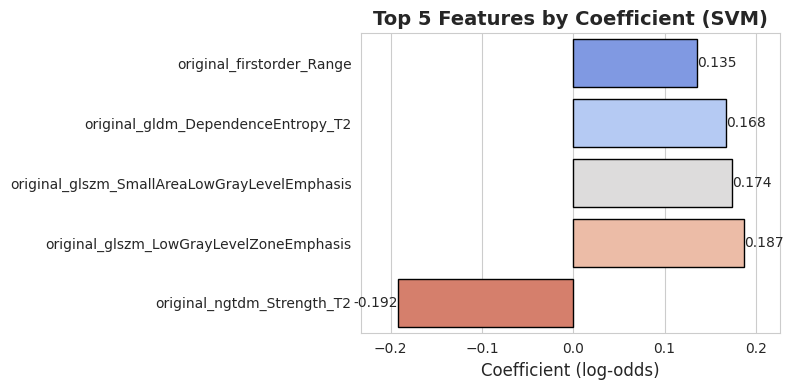

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 5
top_df = feat_importance.head(TOP_N).iloc[::-1]

plt.figure(figsize=(8, max(4, 0.3 * TOP_N)))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='coefficient',
    y='feature',
    data=top_df,
    palette='coolwarm',
    edgecolor='black'
)


for i, coef in enumerate(top_df['coefficient']):
    ax.text(coef, i, f"{coef:.3f}", va='center', fontsize=10,
            ha='left' if coef >= 0 else 'right')

ax.set_xlabel("Coefficient (log-odds)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Coefficient (SVM)", fontsize=14, weight='bold')


xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin - 0.1*abs(xmin), xmax + 0.1*abs(xmax))

plt.tight_layout()
plt.savefig("top_features_coef_SVM.png", dpi=600)
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

X_test_scaled = scaler_final.transform(X_test_df.values)
r = permutation_importance(clf_final, X_test_scaled, y_test,
                           scoring='roc_auc', n_repeats=10, random_state=RND, n_jobs=-1)

feat_importance_perm = pd.DataFrame({
    'feature': X_test_df.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values('importance_mean', ascending=False)

feat_importance_perm.to_csv("feature_importance_SVM_permutation.csv", index=False)
print(feat_importance_perm.head(10))

                                               feature  importance_mean  \
79             original_glszm_LowGrayLevelZoneEmphasis         0.020052   
37                                   original_glcm_MCC         0.014014   
84        original_glszm_SmallAreaLowGrayLevelEmphasis         0.013982   
228                 original_gldm_DependenceEntropy_T2         0.010063   
31                                  original_glcm_Imc1         0.009646   
278                         original_ngtdm_Strength_T2         0.008614   
32                                  original_glcm_Imc2         0.007829   
119                original_glcm_DifferenceVariance_T1         0.007276   
150  original_glrlm_GrayLevelNonUniformityNormalize...         0.007143   
135                 original_gldm_DependenceEntropy_T1         0.006242   

     importance_std  
79         0.003742  
37         0.003558  
84         0.003018  
228        0.005697  
31         0.002824  
278        0.006568  
32         0.003499 

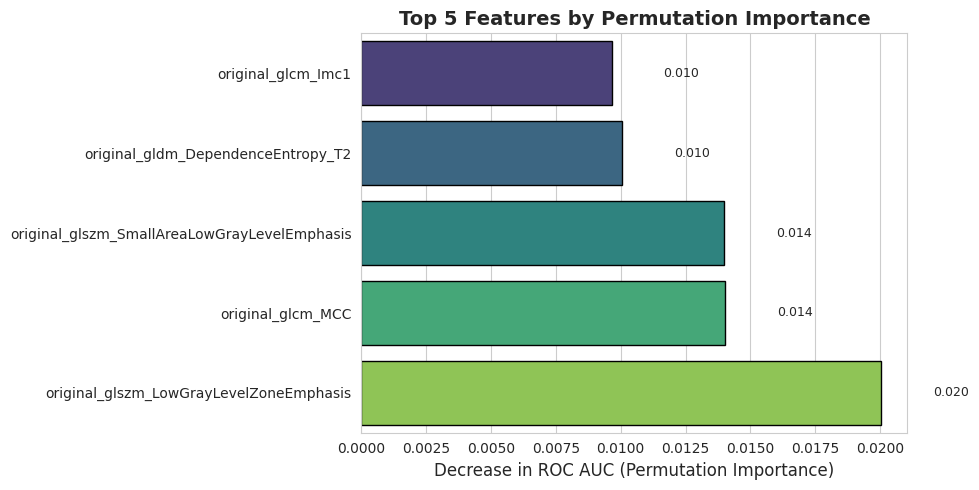

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 5
top_perm_plot = feat_importance_perm.head(TOP_N).iloc[::-1]

plt.figure(figsize=(10, max(5, 0.3 * TOP_N)))
sns.set_style("whitegrid")


ax = sns.barplot(
    x='importance_mean',
    y='feature',
    data=top_perm_plot,
    palette='viridis',
    edgecolor='black',
    ci=None
)

for i, (value) in enumerate(top_perm_plot['importance_mean']):
    ax.text(value + 0.002, i, f"{value:.3f}", va='center', fontsize=9)

ax.set_xlabel("Decrease in ROC AUC (Permutation Importance)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Permutation Importance", fontsize=14, weight='bold')

plt.tight_layout()
plt.savefig("top_features_perm_imp_SVM.png", dpi=600)
plt.show()


#### ROC AUC

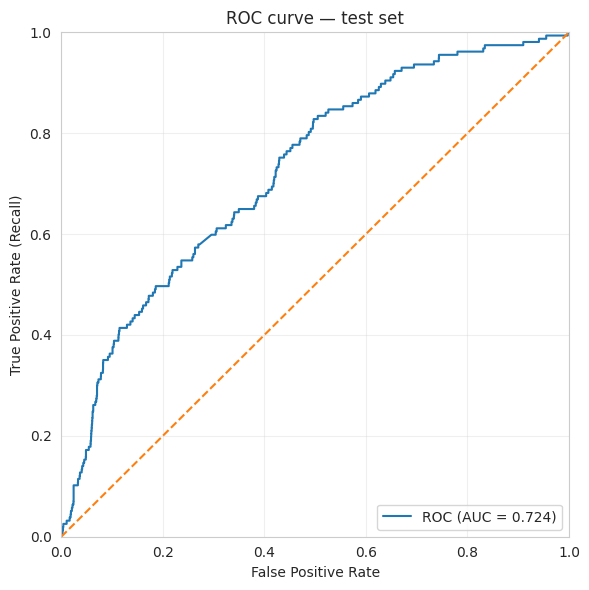

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GroupKFold
from sklearn.base import clone

probs_test = best_model.predict_proba(X_test_df.values)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve — test set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("roc_test_set_SVM.png", dpi=600)
plt.show()

### XGBoost

In [ ]:
from xgboost import XGBClassifier

RND = 42
TEST_SUBJ_FRAC = 0.30
NGKF_SPLITS = 5
THRESHOLDS = np.linspace(0.0, 1.0, 101)

n_estimators_list = [100, 300, 500, 1000]
max_depth_list = [3, 5, 7, 9]
learning_rate_list = [0.001, 0.01, 0.05, 0.1, 0.2]
param_grid = [{'n_estimators': n, 'max_depth': d, 'learning_rate': lr}
              for n, d, lr in product(n_estimators_list, max_depth_list, learning_rate_list)]

baseline_rates = [0.5, 0.7, 0.8]
baseline_runs = 100

In [ ]:
ID_COL = 'Subject'
LABEL_COL = 'label'
VOL_COL = 'vol_label'
VOLUME = 'volume'
BRAIN_COL = 'Brain area'

feature_cols = [c for c in df.columns if c not in (ID_COL, LABEL_COL, VOL_COL, VOLUME, BRAIN_COL)]

X_all = df[feature_cols].copy()
y_all = df[LABEL_COL].astype(int).values
subjects_all = df[ID_COL].values

print("Total samples:", len(df))
print("Unique subjects:", len(np.unique(subjects_all)))
print("Feature count:", X_all.shape[1])
print("Label distribution (all):", np.bincount(y_all))

Total samples: 11088
Unique subjects: 168
Feature count: 279
Label distribution (all): [10660   428]


In [ ]:
unique_subjects = np.array(sorted(np.unique(subjects_all)))
train_subjects, test_subjects = train_test_split(unique_subjects, test_size=TEST_SUBJ_FRAC, random_state=RND, shuffle=True)

def subject_mask(subjects, allowed_subjects):
    aset = set(allowed_subjects)
    return np.array([s in aset for s in subjects])

train_mask = subject_mask(subjects_all, train_subjects)
test_mask  = subject_mask(subjects_all, test_subjects)

X_train_df = X_all.iloc[train_mask].reset_index(drop=True)
y_train = y_all[train_mask]
groups_train = subjects_all[train_mask]

X_test_df = X_all.iloc[test_mask].reset_index(drop=True)
y_test = y_all[test_mask]
groups_test = subjects_all[test_mask]

print("Train subjects:", len(train_subjects), " Test subjects:", len(test_subjects))
print("Train samples:", len(y_train), " Test samples:", len(y_test))
print("Train label counts:", np.bincount(y_train))

Train subjects: 117  Test subjects: 51
Train samples: 7722  Test samples: 3366
Train label counts: [7451  271]


In [ ]:
def patient_level_FN_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    fn = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() == 0:
                fn += 1
    return fn

def patient_level_recall_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    total = 0
    detected = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            total += 1
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() > 0:
                detected += 1
    return detected / total if total > 0 else np.nan

def choose_threshold_minFP_with_patientFN0(probs, y_true, subjects, thresholds=THRESHOLDS):
    best = None
    for t in thresholds:
        preds = (probs >= t).astype(int)
        pfn = patient_level_FN_strict(y_true, preds, subjects)
        fp = int(((preds == 1) & (y_true == 0)).sum())
        if pfn == 0:
            if best is None or fp < best[1] or (fp == best[1] and t < best[0]):
                best = (t, fp, pfn)
    if best is None:
        # minimize patient_FN first, then FP
        best2 = None
        for t in thresholds:
            preds = (probs >= t).astype(int)
            pfn = patient_level_FN_strict(y_true, preds, subjects)
            fp = int(((preds == 1) & (y_true == 0)).sum())
            if best2 is None or pfn < best2[2] or (pfn == best2[2] and fp < best2[1]):
                best2 = (t, fp, pfn)
        return best2
    return best

In [ ]:
rus = RandomUnderSampler(random_state=RND)
scaler = StandardScaler()
gkf = GroupKFold(n_splits=NGKF_SPLITS, random_state=RND, shuffle=True)

best_score = None
best_params = None
best_model = None
best_threshold_on_cv = None
best_avg_rec_region = None

for params in param_grid:
    print("\nTesting params:", params)
    fold_fps = []
    fold_patient_fn = []
    fold_thresholds = []
    fold_recalls_region = []
    fold_recalls_patient = []
    fold_specs_region = []

    for fold_idx, (tr_idx, va_idx) in enumerate(gkf.split(X_train_df, y_train, groups_train)):
        # select fold
        X_tr = X_train_df.iloc[tr_idx].values
        y_tr = y_train[tr_idx]
        X_va = X_train_df.iloc[va_idx].values
        y_va = y_train[va_idx]
        groups_va = groups_train[va_idx]

        # scale
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_va_scaled = scaler.transform(X_va)

        # RandomUnderSampler on train fold
        X_res, y_res = rus.fit_resample(X_tr_scaled, y_tr)

        # classifier: XGBoost
        clf = XGBClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            learning_rate=params['learning_rate'],
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=RND,
            n_jobs=-1
        )
        clf.fit(X_res, y_res)

        # probs on validation fold
        probs = clf.predict_proba(X_va_scaled)[:, 1]

        # choose threshold that ensures strict patient_FN==0 on this fold and minimizes FP
        t, fp_fold, pfn_fold = choose_threshold_minFP_with_patientFN0(probs, y_va, groups_va, thresholds=THRESHOLDS)

        preds = (probs >= t).astype(int)

        # region-level metrics
        rec_region = recall_score(y_va, preds, zero_division=0)

        cm = confusion_matrix(y_va, preds, labels=[0,1])
        tn, fp_count, fn_count, tp_count = cm.ravel()
        spec_region = tn / (tn + fp_count) if (tn + fp_count) > 0 else np.nan  # classic specificity TN/(TN+FP)

        # patient-level (strict)
        rec_patient = patient_level_recall_strict(y_va, preds, groups_va)

        # save fold metrics
        fold_fps.append(fp_fold)
        fold_patient_fn.append(pfn_fold)
        fold_thresholds.append(t)
        fold_recalls_region.append(rec_region)
        fold_recalls_patient.append(rec_patient)
        fold_specs_region.append(spec_region)

        print(f" fold{fold_idx}: t={t:.3f}, fp={fp_fold}, pfn={pfn_fold}, rec_region={rec_region:.3f}, rec_patient={rec_patient:.3f}, spec_region={spec_region:.3f}")

    # aggregate fold metrics
    avg_fp = float(np.mean(fold_fps))
    total_patient_fn = int(np.sum(fold_patient_fn))
    avg_threshold = float(np.mean(fold_thresholds))
    avg_rec_region = float(np.nanmean(fold_recalls_region))
    avg_rec_patient = float(np.nanmean(fold_recalls_patient))
    avg_spec_region = float(np.nanmean(fold_specs_region))

    print("  avg_fp:", avg_fp,
          "total_patient_fn:", total_patient_fn,
          "avg_threshold:", round(avg_threshold,3),
          "avg_rec_region:", round(avg_rec_region,4),
          "avg_rec_patient:", round(avg_rec_patient,4),
          "avg_spec_region:", round(avg_spec_region,4))

    # selection: require strict patient_FN == 0 across folds, minimize avg_fp, tie-breaker max avg_rec_region
    tol_fp = 1e-6
    if total_patient_fn == 0:
        accept = False
        if best_score is None:
            accept = True
        else:
            if avg_fp < best_score - tol_fp:
                accept = True
            elif abs(avg_fp - best_score) <= tol_fp and avg_rec_region > best_avg_rec_region:
                accept = True
        if accept:
            best_score = avg_fp
            best_params = params
            best_threshold_on_cv = avg_threshold
            best_avg_rec_region = avg_rec_region

            # train final model on full train (scale + RandomUnderSampler)
            X_train_scaled = scaler.fit_transform(X_train_df.values)
            X_train_res, y_train_res = rus.fit_resample(X_train_scaled, y_train)
            final_clf = XGBClassifier(
                n_estimators=params['n_estimators'],
                max_depth=params['max_depth'],
                learning_rate=params['learning_rate'],
                use_label_encoder=False,
                eval_metric='logloss',
                random_state=RND,
                n_jobs=-1
            )
            final_clf.fit(X_train_res, y_train_res)
            best_model = Pipeline([('scaler', scaler), ('clf', final_clf)])

print("BEST params:", best_params)
print("BEST avg_fp:", best_score)
print("BEST avg_rec_region:", best_avg_rec_region)
print("BEST threshold (mean from folds):", best_threshold_on_cv)


Testing params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.001}
 fold0: t=0.470, fp=1510, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.013
 fold1: t=0.000, fp=1525, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold2: t=0.000, fp=1450, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold3: t=0.000, fp=1470, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold4: t=0.000, fp=1476, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
  avg_fp: 1486.2 total_patient_fn: 0 avg_threshold: 0.094 avg_rec_region: 1.0 avg_rec_patient: 1.0 avg_spec_region: 0.0026

Testing params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
 fold0: t=0.360, fp=1212, pfn=0, rec_region=0.907, rec_patient=1.000, spec_region=0.208
 fold1: t=0.370, fp=1211, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.206
 fold2: t=0.410, fp=779, pfn=0, rec_region=0.838, rec_patient=1.000, spec_region=0.463
 fold3: t=0.300, 

In [ ]:
scaler_final = best_model.named_steps['scaler']
clf_final = best_model.named_steps['clf']

X_test_scaled = scaler_final.transform(X_test_df.values)
probs_test = clf_final.predict_proba(X_test_scaled)[:, 1]
pred_test = (probs_test >= best_threshold_on_cv).astype(int)

cm_test = confusion_matrix(y_test, pred_test, labels=[0,1])
tn, fp, fn, tp = cm_test.ravel()
region_recall = recall_score(y_test, pred_test, zero_division=0)
region_precision = precision_score(y_test, pred_test, zero_division=0)
region_f1 = f1_score(y_test, pred_test, zero_division=0)
region_specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan  # TN/(TN+FP)

p_rec_strict = patient_level_recall_strict(y_test, pred_test, groups_test)
pfn_strict = patient_level_FN_strict(y_test, pred_test, groups_test)

print("\n TEST results for best_model")
print(f"Region: TP={tp}, FP={fp}, FN={fn}, TN={tn}")
print(f"region_precision={region_precision:.3f}, region_recall={region_recall:.3f}, region_f1={region_f1:.3f}, region_specificity={region_specificity:.3f}")
print(f"patient_recall_strict={p_rec_strict:.3f}, patient_FN_strict={pfn_strict}")

results_df = pd.DataFrame({
    "true_label": y_test,
    "predicted_label": pred_test,
    "predicted_prob": probs_test,
})


results_df.to_csv("predictions_XGBoost_test.csv", index=False)


 TEST results for best_model
Region: TP=136, FP=2199, FN=21, TN=1010
region_precision=0.058, region_recall=0.866, region_f1=0.109, region_specificity=0.315
patient_recall_strict=0.922, patient_FN_strict=4


#### Feature Importance

In [ ]:
clf_final = best_model.named_steps['clf']

importances = clf_final.feature_importances_
feature_names = X_train_df.columns

feat_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feat_importance.head(10))

feat_importance.to_csv("feature_importance_XGBoost_coef.csv", index=False)

                                               feature  importance
158           original_glrlm_RunLengthNonUniformity_T1    0.027955
276                       original_ngtdm_Complexity_T2    0.021043
128                       original_glcm_JointEnergy_T1    0.020697
253                    original_glrlm_RunPercentage_T2    0.020462
135                 original_gldm_DependenceEntropy_T1    0.020153
203                    original_firstorder_Variance_T2    0.018752
66     original_glrlm_RunLengthNonUniformityNormalized    0.016366
165           original_glszm_GrayLevelNonUniformity_T1    0.016008
17                        original_firstorder_Variance    0.015071
230  original_gldm_DependenceNonUniformityNormalize...    0.014053


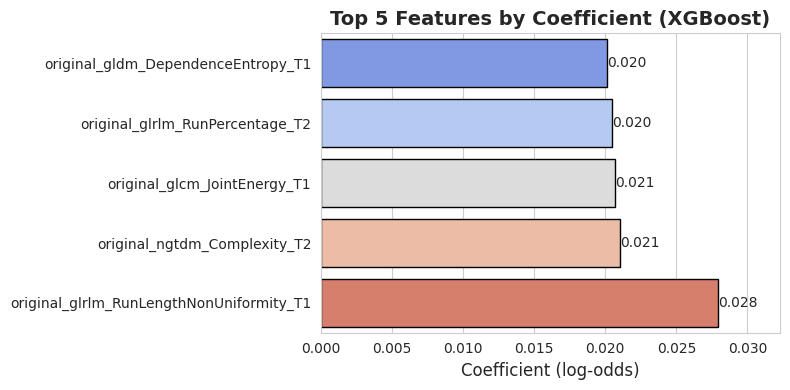

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 5
top_df = feat_importance.head(TOP_N).iloc[::-1]

plt.figure(figsize=(8, max(4, 0.3 * TOP_N)))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='importance',
    y='feature',
    data=top_df,
    palette='coolwarm',
    edgecolor='black'
)


for i, coef in enumerate(top_df['importance']):
    ax.text(coef, i, f"{coef:.3f}", va='center', fontsize=10,
            ha='left' if coef >= 0 else 'right')

ax.set_xlabel("Coefficient (log-odds)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Coefficient (XGBoost)", fontsize=14, weight='bold')


xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin - 0.1*abs(xmin), xmax + 0.1*abs(xmax))

plt.tight_layout()
plt.savefig("top_features_coef_XGBoost.png", dpi=600)
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

X_test_scaled = scaler_final.transform(X_test_df.values)
r = permutation_importance(clf_final, X_test_scaled, y_test,
                           scoring='roc_auc', n_repeats=10, random_state=RND, n_jobs=-1)

feat_importance_perm = pd.DataFrame({
    'feature': X_test_df.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values('importance_mean', ascending=False)

feat_importance_perm.to_csv("feature_importance_XGBoost_permutation.csv", index=False)
print(feat_importance_perm.head(10))

                                               feature  importance_mean  \
6                          original_firstorder_Maximum         0.013558   
228                 original_gldm_DependenceEntropy_T2         0.010455   
271                      original_glszm_ZoneEntropy_T2         0.010380   
98                     original_firstorder_Kurtosis_T1         0.007616   
135                 original_gldm_DependenceEntropy_T1         0.006869   
29                                  original_glcm_Idmn         0.004910   
137  original_gldm_DependenceNonUniformityNormalize...         0.004707   
83       original_glszm_SmallAreaHighGrayLevelEmphasis         0.004680   
107                    original_firstorder_Skewness_T1         0.004260   
32                                  original_glcm_Imc2         0.004201   

     importance_std  
6          0.003890  
228        0.006166  
271        0.004234  
98         0.004262  
135        0.004688  
29         0.003964  
137        0.001826 

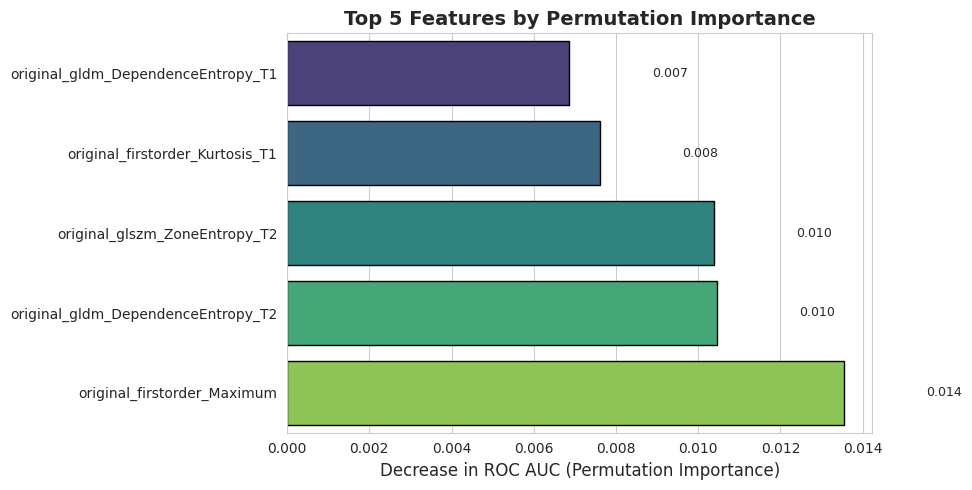

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 5
top_perm_plot = feat_importance_perm.head(TOP_N).iloc[::-1]

plt.figure(figsize=(10, max(5, 0.3 * TOP_N)))
sns.set_style("whitegrid")


ax = sns.barplot(
    x='importance_mean',
    y='feature',
    data=top_perm_plot,
    palette='viridis',
    edgecolor='black',
    ci=None
)

for i, (value) in enumerate(top_perm_plot['importance_mean']):
    ax.text(value + 0.002, i, f"{value:.3f}", va='center', fontsize=9)

ax.set_xlabel("Decrease in ROC AUC (Permutation Importance)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Permutation Importance", fontsize=14, weight='bold')

plt.tight_layout()
plt.savefig("top_features_perm_imp_XGBoost.png", dpi=600)
plt.show()


#### ROC AUC

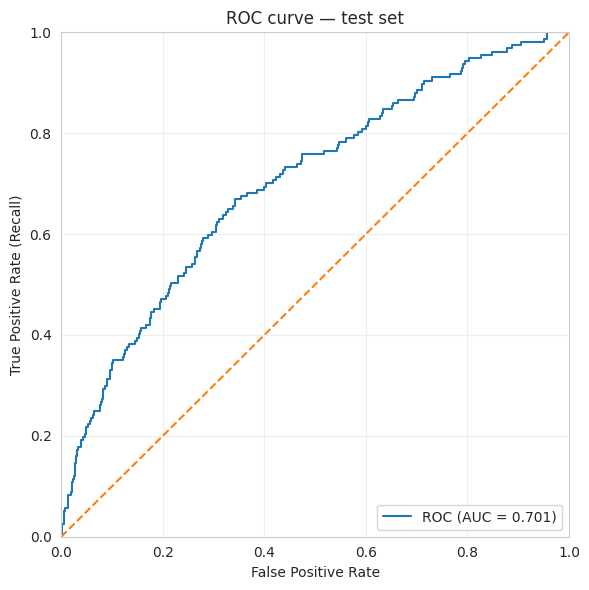

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GroupKFold
from sklearn.base import clone

probs_test = best_model.predict_proba(X_test_df.values)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve — test set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("roc_test_set_XGBoost.png", dpi=600)
plt.show()

## Gradient Boost

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

RND = 42
TEST_SUBJ_FRAC = 0.30
NGKF_SPLITS = 5
THRESHOLDS = np.linspace(0.0, 1.0, 101)

loss = ['log_loss', 'exponential']
learning_rate = [0.1, 1, 10, 100]
n_estimators = [1, 10, 50, 100]
subsample = [0.01, 0.1]
criterion = ['friedman_mse', 'squared_error']
param_grid = [{'loss': l, 'learning_rate': lr, 'n_estimators': n, 'subsample':s, 'criterion':c}
              for l, lr, n, s, c in product(loss, learning_rate, n_estimators, subsample, criterion)]

baseline_rates = [0.5, 0.7, 0.8]
baseline_runs = 100

In [34]:
ID_COL = 'Subject'
LABEL_COL = 'label'
VOL_COL = 'vol_label'
VOLUME = 'volume'
BRAIN_COL = 'Brain area'

feature_cols = [c for c in df.columns if c not in (ID_COL, LABEL_COL, VOL_COL, VOLUME, BRAIN_COL)]

X_all = df[feature_cols].copy()
y_all = df[LABEL_COL].astype(int).values
subjects_all = df[ID_COL].values

print("Total samples:", len(df))
print("Unique subjects:", len(np.unique(subjects_all)))
print("Feature count:", X_all.shape[1])
print("Label distribution (all):", np.bincount(y_all))

Total samples: 11088
Unique subjects: 168
Feature count: 279
Label distribution (all): [10660   428]


In [35]:
unique_subjects = np.array(sorted(np.unique(subjects_all)))
train_subjects, test_subjects = train_test_split(unique_subjects, test_size=TEST_SUBJ_FRAC, random_state=RND, shuffle=True)

def subject_mask(subjects, allowed_subjects):
    aset = set(allowed_subjects)
    return np.array([s in aset for s in subjects])

train_mask = subject_mask(subjects_all, train_subjects)
test_mask  = subject_mask(subjects_all, test_subjects)

X_train_df = X_all.iloc[train_mask].reset_index(drop=True)
y_train = y_all[train_mask]
groups_train = subjects_all[train_mask]

X_test_df = X_all.iloc[test_mask].reset_index(drop=True)
y_test = y_all[test_mask]
groups_test = subjects_all[test_mask]

print("Train subjects:", len(train_subjects), " Test subjects:", len(test_subjects))
print("Train samples:", len(y_train), " Test samples:", len(y_test))
print("Train label counts:", np.bincount(y_train))

Train subjects: 117  Test subjects: 51
Train samples: 7722  Test samples: 3366
Train label counts: [7451  271]


In [36]:
def patient_level_FN_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    fn = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() == 0:
                fn += 1
    return fn

def patient_level_recall_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    total = 0
    detected = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            total += 1
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() > 0:
                detected += 1
    return detected / total if total > 0 else np.nan

def choose_threshold_minFP_with_patientFN0(probs, y_true, subjects, thresholds=THRESHOLDS):
    best = None
    for t in thresholds:
        preds = (probs >= t).astype(int)
        pfn = patient_level_FN_strict(y_true, preds, subjects)
        fp = int(((preds == 1) & (y_true == 0)).sum())
        if pfn == 0:
            if best is None or fp < best[1] or (fp == best[1] and t < best[0]):
                best = (t, fp, pfn)
    if best is None:
        # minimize patient_FN first, then FP
        best2 = None
        for t in thresholds:
            preds = (probs >= t).astype(int)
            pfn = patient_level_FN_strict(y_true, preds, subjects)
            fp = int(((preds == 1) & (y_true == 0)).sum())
            if best2 is None or pfn < best2[2] or (pfn == best2[2] and fp < best2[1]):
                best2 = (t, fp, pfn)
        return best2
    return best

In [37]:
rus = RandomUnderSampler(random_state=RND)
scaler = StandardScaler()
gkf = GroupKFold(n_splits=NGKF_SPLITS, random_state=RND, shuffle=True)

best_score = None
best_params = None
best_model = None
best_threshold_on_cv = None
best_avg_rec_region = None

for params in param_grid:
    print("\nTesting params:", params)
    fold_fps = []
    fold_patient_fn = []
    fold_thresholds = []
    fold_recalls_region = []
    fold_recalls_patient = []
    fold_specs_region = []

    for fold_idx, (tr_idx, va_idx) in enumerate(gkf.split(X_train_df, y_train, groups_train)):
        # select fold
        X_tr = X_train_df.iloc[tr_idx].values
        y_tr = y_train[tr_idx]
        X_va = X_train_df.iloc[va_idx].values
        y_va = y_train[va_idx]
        groups_va = groups_train[va_idx]

        # scale
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_va_scaled = scaler.transform(X_va)

        # RandomUnderSampler on train fold
        X_res, y_res = rus.fit_resample(X_tr_scaled, y_tr)

        # classifier: XGBoost
        clf = GradientBoostingClassifier(
            loss = params['loss'],
            learning_rate = params['learning_rate'],
            n_estimators = params['n_estimators'],
            subsample = params['subsample'],
            criterion = params['criterion'],
            random_state=RND)
        clf.fit(X_res, y_res)

        # probs on validation fold
        probs = clf.predict_proba(X_va_scaled)[:, 1]

        # choose threshold that ensures strict patient_FN==0 on this fold and minimizes FP
        t, fp_fold, pfn_fold = choose_threshold_minFP_with_patientFN0(probs, y_va, groups_va, thresholds=THRESHOLDS)

        preds = (probs >= t).astype(int)

        # region-level metrics
        rec_region = recall_score(y_va, preds, zero_division=0)

        cm = confusion_matrix(y_va, preds, labels=[0,1])
        tn, fp_count, fn_count, tp_count = cm.ravel()
        spec_region = tn / (tn + fp_count) if (tn + fp_count) > 0 else np.nan  # classic specificity TN/(TN+FP)

        # patient-level (strict)
        rec_patient = patient_level_recall_strict(y_va, preds, groups_va)

        # save fold metrics
        fold_fps.append(fp_fold)
        fold_patient_fn.append(pfn_fold)
        fold_thresholds.append(t)
        fold_recalls_region.append(rec_region)
        fold_recalls_patient.append(rec_patient)
        fold_specs_region.append(spec_region)

        print(f" fold{fold_idx}: t={t:.3f}, fp={fp_fold}, pfn={pfn_fold}, rec_region={rec_region:.3f}, rec_patient={rec_patient:.3f}, spec_region={spec_region:.3f}")

    # aggregate fold metrics
    avg_fp = float(np.mean(fold_fps))
    total_patient_fn = int(np.sum(fold_patient_fn))
    avg_threshold = float(np.mean(fold_thresholds))
    avg_rec_region = float(np.nanmean(fold_recalls_region))
    avg_rec_patient = float(np.nanmean(fold_recalls_patient))
    avg_spec_region = float(np.nanmean(fold_specs_region))

    print("  avg_fp:", avg_fp,
          "total_patient_fn:", total_patient_fn,
          "avg_threshold:", round(avg_threshold,3),
          "avg_rec_region:", round(avg_rec_region,4),
          "avg_rec_patient:", round(avg_rec_patient,4),
          "avg_spec_region:", round(avg_spec_region,4))

    # selection: require strict patient_FN == 0 across folds, minimize avg_fp, tie-breaker max avg_rec_region
    tol_fp = 1e-6
    if total_patient_fn == 0:
        accept = False
        if best_score is None:
            accept = True
        else:
            if avg_fp < best_score - tol_fp:
                accept = True
            elif abs(avg_fp - best_score) <= tol_fp and avg_rec_region > best_avg_rec_region:
                accept = True
        if accept:
            best_score = avg_fp
            best_params = params
            best_threshold_on_cv = avg_threshold
            best_avg_rec_region = avg_rec_region

            # train final model on full train (scale + RandomUnderSampler)
            X_train_scaled = scaler.fit_transform(X_train_df.values)
            X_train_res, y_train_res = rus.fit_resample(X_train_scaled, y_train)
            final_clf = GradientBoostingClassifier(
                loss = params['loss'],
                learning_rate = params['learning_rate'],
                n_estimators = params['n_estimators'],
                subsample = params['subsample'],
                criterion = params['criterion'],
                random_state=RND)
            final_clf.fit(X_train_res, y_train_res)
            best_model = Pipeline([('scaler', scaler), ('clf', final_clf)])

print("BEST params:", best_params)
print("BEST avg_fp:", best_score)
print("BEST avg_rec_region:", best_avg_rec_region)
print("BEST threshold (mean from folds):", best_threshold_on_cv)


Testing params: {'loss': 'log_loss', 'learning_rate': 0.1, 'n_estimators': 1, 'subsample': 0.01, 'criterion': 'friedman_mse'}
 fold0: t=0.000, fp=1530, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold1: t=0.000, fp=1525, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold2: t=0.000, fp=1450, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold3: t=0.000, fp=1470, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold4: t=0.000, fp=1476, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
  avg_fp: 1490.2 total_patient_fn: 0 avg_threshold: 0.0 avg_rec_region: 1.0 avg_rec_patient: 1.0 avg_spec_region: 0.0

Testing params: {'loss': 'log_loss', 'learning_rate': 0.1, 'n_estimators': 1, 'subsample': 0.01, 'criterion': 'squared_error'}
 fold0: t=0.000, fp=1530, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold1: t=0.000, fp=1525, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold2: t=0

In [38]:
scaler_final = best_model.named_steps['scaler']
clf_final = best_model.named_steps['clf']

X_test_scaled = scaler_final.transform(X_test_df.values)
probs_test = clf_final.predict_proba(X_test_scaled)[:, 1]
pred_test = (probs_test >= best_threshold_on_cv).astype(int)

cm_test = confusion_matrix(y_test, pred_test, labels=[0,1])
tn, fp, fn, tp = cm_test.ravel()
region_recall = recall_score(y_test, pred_test, zero_division=0)
region_precision = precision_score(y_test, pred_test, zero_division=0)
region_f1 = f1_score(y_test, pred_test, zero_division=0)
region_specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan  # TN/(TN+FP)

p_rec_strict = patient_level_recall_strict(y_test, pred_test, groups_test)
pfn_strict = patient_level_FN_strict(y_test, pred_test, groups_test)

print("\n TEST results for best_model")
print(f"Region: TP={tp}, FP={fp}, FN={fn}, TN={tn}")
print(f"region_precision={region_precision:.3f}, region_recall={region_recall:.3f}, region_f1={region_f1:.3f}, region_specificity={region_specificity:.3f}")
print(f"patient_recall_strict={p_rec_strict:.3f}, patient_FN_strict={pfn_strict}")

results_df = pd.DataFrame({
    "true_label": y_test,
    "predicted_label": pred_test,
    "predicted_prob": probs_test,
})


results_df.to_csv("predictions_GBoost_test.csv", index=False)


 TEST results for best_model
Region: TP=118, FP=1913, FN=39, TN=1296
region_precision=0.058, region_recall=0.752, region_f1=0.108, region_specificity=0.404
patient_recall_strict=0.863, patient_FN_strict=7


#### Feature Importance

In [39]:
clf_final = best_model.named_steps['clf']

importances = clf_final.feature_importances_
feature_names = X_train_df.columns

feat_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feat_importance.head(10))

feat_importance.to_csv("feature_importance_GBoost_coef.csv", index=False)

                                           feature  importance
191                original_firstorder_Kurtosis_T2    0.031997
218                          original_glcm_Imc2_T2    0.021667
224            original_glcm_MaximumProbability_T2    0.019848
72           original_glszm_GrayLevelNonUniformity    0.018951
77   original_glszm_LargeAreaHighGrayLevelEmphasis    0.018905
234         original_gldm_HighGrayLevelEmphasis_T2    0.016127
268            original_glszm_SmallAreaEmphasis_T2    0.015387
175            original_glszm_SmallAreaEmphasis_T1    0.015368
181                     original_ngtdm_Busyness_T1    0.015272
38                original_glcm_MaximumProbability    0.014930


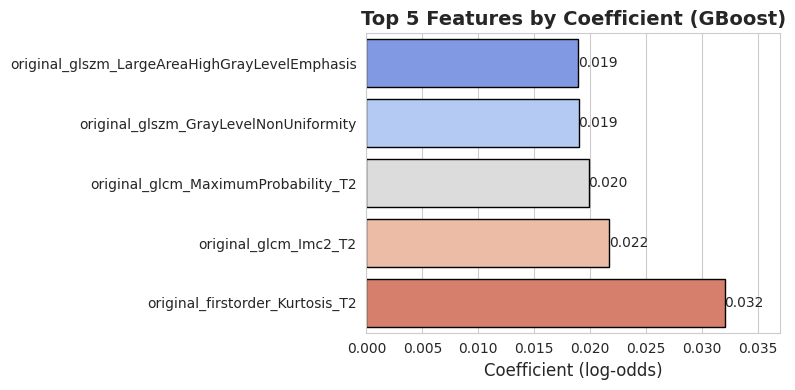

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 5
top_df = feat_importance.head(TOP_N).iloc[::-1]

plt.figure(figsize=(8, max(4, 0.3 * TOP_N)))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='importance',
    y='feature',
    data=top_df,
    palette='coolwarm',
    edgecolor='black'
)


for i, coef in enumerate(top_df['importance']):
    ax.text(coef, i, f"{coef:.3f}", va='center', fontsize=10,
            ha='left' if coef >= 0 else 'right')

ax.set_xlabel("Coefficient (log-odds)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Coefficient (GBoost)", fontsize=14, weight='bold')


xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin - 0.1*abs(xmin), xmax + 0.1*abs(xmax))

plt.tight_layout()
plt.savefig("top_features_coef_GBoost.png", dpi=600)
plt.show()

#### Feature permutation importance

In [41]:
from sklearn.inspection import permutation_importance

X_test_scaled = scaler_final.transform(X_test_df.values)
r = permutation_importance(clf_final, X_test_scaled, y_test,
                           scoring='roc_auc', n_repeats=10, random_state=RND, n_jobs=-1)

feat_importance_perm = pd.DataFrame({
    'feature': X_test_df.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values('importance_mean', ascending=False)

feat_importance_perm.to_csv("feature_importance_GBoost_permutation.csv", index=False)
print(feat_importance_perm.head(10))

                                               feature  importance_mean  \
79             original_glszm_LowGrayLevelZoneEmphasis         0.015680   
52                  original_gldm_LowGrayLevelEmphasis         0.012930   
137  original_gldm_DependenceNonUniformityNormalize...         0.012145   
224                original_glcm_MaximumProbability_T2         0.011714   
268                original_glszm_SmallAreaEmphasis_T2         0.010173   
87                         original_glszm_ZoneVariance         0.009859   
70        original_glrlm_ShortRunHighGrayLevelEmphasis         0.009521   
151                original_glrlm_GrayLevelVariance_T1         0.009257   
208                          original_glcm_Contrast_T2         0.009157   
104                       original_firstorder_Range_T1         0.008518   

     importance_std  
79         0.002933  
52         0.003170  
137        0.002412  
224        0.002928  
268        0.001778  
87         0.003311  
70         0.001309 

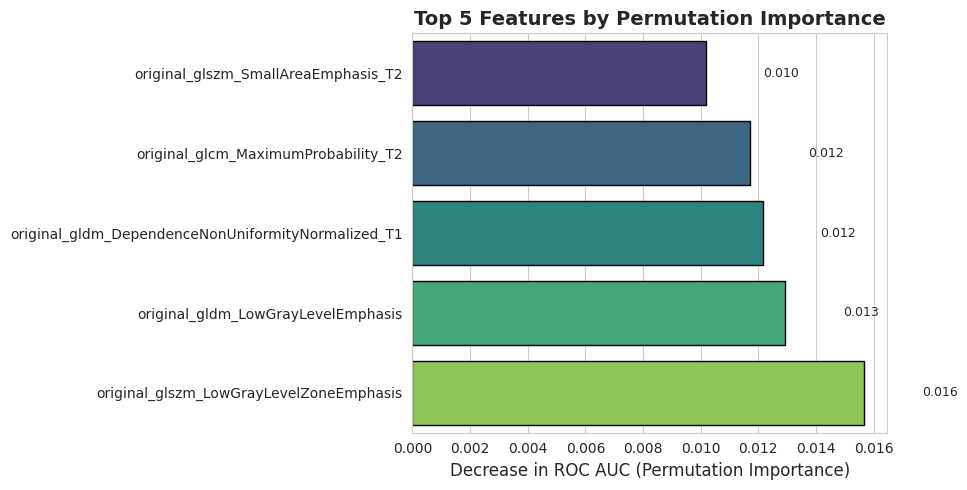

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 5
top_perm_plot = feat_importance_perm.head(TOP_N).iloc[::-1]

plt.figure(figsize=(10, max(5, 0.3 * TOP_N)))
sns.set_style("whitegrid")


ax = sns.barplot(
    x='importance_mean',
    y='feature',
    data=top_perm_plot,
    palette='viridis',
    edgecolor='black',
    ci=None
)

for i, (value) in enumerate(top_perm_plot['importance_mean']):
    ax.text(value + 0.002, i, f"{value:.3f}", va='center', fontsize=9)

ax.set_xlabel("Decrease in ROC AUC (Permutation Importance)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Permutation Importance", fontsize=14, weight='bold')

plt.tight_layout()
plt.savefig("top_features_perm_imp_GBoost.png", dpi=600)
plt.show()

#### ROC AUC

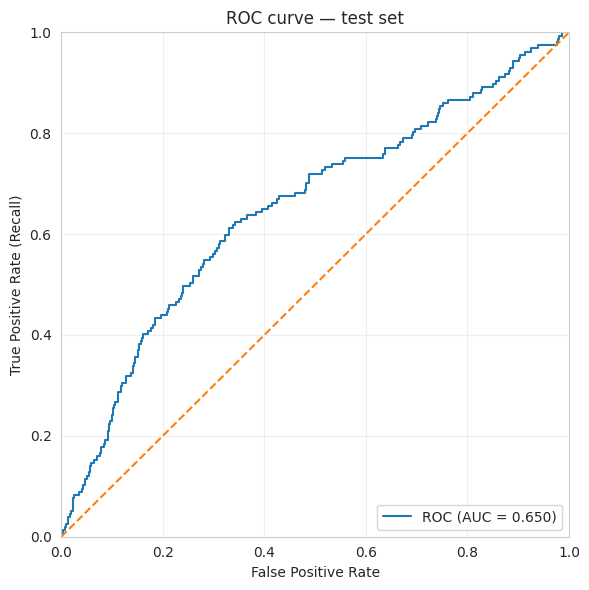

In [43]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GroupKFold
from sklearn.base import clone

probs_test = best_model.predict_proba(X_test_df.values)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve — test set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("roc_test_set_GB.png", dpi=600)
plt.show()

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from itertools import product

RND = 42
TEST_SUBJ_FRAC = 0.30
NGKF_SPLITS = 5
THRESHOLDS = np.linspace(0.0, 1.0, 101)
n_estimators = [3, 5, 7, 10, 20, 30, 50, 100, 200]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [None, 5, 20, 100]
max_features = ['sqrt', 'log2', None]
class_weight = ['balanced', 'balanced_subsample']
param_grid = [{'n_estimators': n,'criterion':c, 'max_features' :milf, 'class_weight':clw}
              for n, c, milf, clw in product(n_estimators, criterion, max_features, class_weight)]

# random baseline settings (ваши)
baseline_rates = [0.5, 0.7, 0.8]
baseline_runs = 100

In [45]:
D_COL = 'Subject'
LABEL_COL = 'label'
VOL_COL = 'vol_label'
VOLUME = 'volume'
BRAIN_COL = 'Brain area'

feature_cols = [c for c in df.columns if c not in (ID_COL, LABEL_COL, VOL_COL, VOLUME, BRAIN_COL)]

X_all = df[feature_cols].copy()
y_all = df[LABEL_COL].astype(int).values
subjects_all = df[ID_COL].values

print("Total samples:", len(df))
print("Unique subjects:", len(np.unique(subjects_all)))
print("Feature count:", X_all.shape[1])
print("Label distribution (all):", np.bincount(y_all))

unique_subjects = np.array(sorted(np.unique(subjects_all)))
train_subjects, test_subjects = train_test_split(unique_subjects, test_size=TEST_SUBJ_FRAC, random_state=RND, shuffle=True)

def subject_mask(subjects, allowed_subjects):
    aset = set(allowed_subjects)
    return np.array([s in aset for s in subjects])

train_mask = subject_mask(subjects_all, train_subjects)
test_mask  = subject_mask(subjects_all, test_subjects)

X_train_df = X_all.iloc[train_mask].reset_index(drop=True)
y_train = y_all[train_mask]
groups_train = subjects_all[train_mask]

X_test_df = X_all.iloc[test_mask].reset_index(drop=True)
y_test = y_all[test_mask]
groups_test = subjects_all[test_mask]

print("Train subjects:", len(train_subjects), " Test subjects:", len(test_subjects))
print("Train samples:", len(y_train), " Test samples:", len(y_test))
print("Train label counts:", np.bincount(y_train))

Total samples: 11088
Unique subjects: 168
Feature count: 279
Label distribution (all): [10660   428]
Train subjects: 117  Test subjects: 51
Train samples: 7722  Test samples: 3366
Train label counts: [7451  271]


In [46]:
def patient_level_FN_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    fn = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() == 0:
                fn += 1
    return fn

def patient_level_recall_strict(y_true, y_pred, subjects):
    df = pd.DataFrame({'y': y_true, 'pred': y_pred, 'subj': subjects})
    total = 0
    detected = 0
    for subj, g in df.groupby('subj'):
        if g['y'].sum() > 0:
            total += 1
            if ((g['y'] == 1) & (g['pred'] == 1)).sum() > 0:
                detected += 1
    return detected / total if total > 0 else np.nan

def choose_threshold_minFP_with_patientFN0(probs, y_true, subjects, thresholds=THRESHOLDS):
    best = None
    for t in thresholds:
        preds = (probs >= t).astype(int)
        pfn = patient_level_FN_strict(y_true, preds, subjects)
        fp = int(((preds == 1) & (y_true == 0)).sum())
        if pfn == 0:
            if best is None or fp < best[1] or (fp == best[1] and t < best[0]):
                best = (t, fp, pfn)
    if best is None:
        # minimize patient_FN first, then FP
        best2 = None
        for t in thresholds:
            preds = (probs >= t).astype(int)
            pfn = patient_level_FN_strict(y_true, preds, subjects)
            fp = int(((preds == 1) & (y_true == 0)).sum())
            if best2 is None or pfn < best2[2] or (pfn == best2[2] and fp < best2[1]):
                best2 = (t, fp, pfn)
        return best2
    return best

In [47]:
rus = RandomUnderSampler(random_state=RND)
scaler = StandardScaler()
gkf = GroupKFold(n_splits=NGKF_SPLITS, random_state=RND, shuffle=True)

best_score = None
best_params = None
best_model = None
best_threshold_on_cv = None
best_avg_rec_region = None

for params in param_grid:
    print("\nTesting params:", params)
    fold_fps = []
    fold_patient_fn = []
    fold_thresholds = []
    fold_recalls_region = []
    fold_recalls_patient = []
    fold_specs_region = []

    for fold_idx, (tr_idx, va_idx) in enumerate(gkf.split(X_train_df, y_train, groups_train)):
        # select fold
        X_tr = X_train_df.iloc[tr_idx].values
        y_tr = y_train[tr_idx]
        X_va = X_train_df.iloc[va_idx].values
        y_va = y_train[va_idx]
        groups_va = groups_train[va_idx]

        # scale
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_va_scaled = scaler.transform(X_va)

        # RandomUnderSampler on train fold
        X_res, y_res = rus.fit_resample(X_tr_scaled, y_tr)

        # classifier: KNeighborsClassifier
        clf = RandomForestClassifier(n_estimators = params['n_estimators'], 
                                   criterion  = params['criterion'], 
                                   max_features = params['max_features'], 
                                   class_weight = params['class_weight'],
                                   random_state=RND,
                                   n_jobs=-1)
        clf.fit(X_res, y_res)

        # probs on validation fold (KNN поддерживает predict_proba)
        probs = clf.predict_proba(X_va_scaled)[:, 1]

        # choose threshold that ensures strict patient_FN==0 on this fold and minimizes FP
        t, fp_fold, pfn_fold = choose_threshold_minFP_with_patientFN0(probs, y_va, groups_va, thresholds=THRESHOLDS)

        preds = (probs >= t).astype(int)

        # region-level metrics
        rec_region = recall_score(y_va, preds, zero_division=0)

        cm = confusion_matrix(y_va, preds, labels=[0,1])
        tn, fp_count, fn_count, tp_count = cm.ravel()
        spec_region = tn / (tn + fp_count) if (tn + fp_count) > 0 else np.nan  # classic specificity TN/(TN+FP)

        # patient-level (strict)
        rec_patient = patient_level_recall_strict(y_va, preds, groups_va)

        # save fold metrics
        fold_fps.append(fp_fold)
        fold_patient_fn.append(pfn_fold)
        fold_thresholds.append(t)
        fold_recalls_region.append(rec_region)
        fold_recalls_patient.append(rec_patient)
        fold_specs_region.append(spec_region)

        print(f" fold{fold_idx}: t={t:.3f}, fp={fp_fold}, pfn={pfn_fold}, rec_region={rec_region:.3f}, rec_patient={rec_patient:.3f}, spec_region={spec_region:.3f}")

    # aggregate fold metrics
    avg_fp = float(np.mean(fold_fps))
    total_patient_fn = int(np.sum(fold_patient_fn))
    avg_threshold = float(np.mean(fold_thresholds))
    avg_rec_region = float(np.nanmean(fold_recalls_region))
    avg_rec_patient = float(np.nanmean(fold_recalls_patient))
    avg_spec_region = float(np.nanmean(fold_specs_region))

    print("  avg_fp:", avg_fp,
          "total_patient_fn:", total_patient_fn,
          "avg_threshold:", round(avg_threshold,3),
          "avg_rec_region:", round(avg_rec_region,4),
          "avg_rec_patient:", round(avg_rec_patient,4),
          "avg_spec_region:", round(avg_spec_region,4))

    # selection: require strict patient_FN == 0 across folds, minimize avg_fp, tie-breaker max avg_rec_region
    tol_fp = 1e-6
    if total_patient_fn == 0:
        accept = False
        if best_score is None:
            accept = True
        else:
            if avg_fp < best_score - tol_fp:
                accept = True
            elif abs(avg_fp - best_score) <= tol_fp and avg_rec_region > best_avg_rec_region:
                accept = True
        if accept:
            best_score = avg_fp
            best_params = params
            best_threshold_on_cv = avg_threshold
            best_avg_rec_region = avg_rec_region

            # train final model on full train (scale + RandomUnderSampler)
            X_train_scaled = scaler.fit_transform(X_train_df.values)
            X_train_res, y_train_res = rus.fit_resample(X_train_scaled, y_train)
            final_clf = RandomForestClassifier(n_estimators = params['n_estimators'], 
                                   criterion  = params['criterion'], 
                                   max_features = params['max_features'], 
                                   class_weight = params['class_weight'],
                                   random_state=RND,
                                   n_jobs=-1)

            final_clf.fit(X_train_res, y_train_res)
            best_model = Pipeline([('scaler', scaler), ('clf', final_clf)])

print("BEST params:", best_params)
print("BEST avg_fp:", best_score)
print("BEST avg_rec_region:", best_avg_rec_region)
print("BEST threshold (mean from folds):", best_threshold_on_cv)


Testing params: {'n_estimators': 3, 'criterion': 'gini', 'max_features': 'sqrt', 'class_weight': 'balanced'}
 fold0: t=0.000, fp=1530, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold1: t=0.000, fp=1525, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold2: t=0.010, fp=1161, pfn=0, rec_region=0.956, rec_patient=1.000, spec_region=0.199
 fold3: t=0.000, fp=1470, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold4: t=0.010, fp=1096, pfn=0, rec_region=0.929, rec_patient=1.000, spec_region=0.257
  avg_fp: 1356.4 total_patient_fn: 0 avg_threshold: 0.004 avg_rec_region: 0.9769 avg_rec_patient: 1.0 avg_spec_region: 0.0914

Testing params: {'n_estimators': 3, 'criterion': 'gini', 'max_features': 'sqrt', 'class_weight': 'balanced_subsample'}
 fold0: t=0.000, fp=1530, pfn=0, rec_region=1.000, rec_patient=1.000, spec_region=0.000
 fold1: t=0.010, fp=1157, pfn=0, rec_region=0.898, rec_patient=1.000, spec_region=0.241
 fold2: t=0.000, fp=1450, pf

In [48]:
scaler_final = best_model.named_steps['scaler']
clf_final = best_model.named_steps['clf']

X_test_scaled = scaler_final.transform(X_test_df.values)
probs_test = clf_final.predict_proba(X_test_scaled)[:, 1]
pred_test = (probs_test >= best_threshold_on_cv).astype(int)

cm_test = confusion_matrix(y_test, pred_test, labels=[0,1])
tn, fp, fn, tp = cm_test.ravel()
region_recall = recall_score(y_test, pred_test, zero_division=0)
region_precision = precision_score(y_test, pred_test, zero_division=0)
region_f1 = f1_score(y_test, pred_test, zero_division=0)
region_specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan  # TN/(TN+FP)

p_rec_strict = patient_level_recall_strict(y_test, pred_test, groups_test)
pfn_strict = patient_level_FN_strict(y_test, pred_test, groups_test)

print("\n TEST results for best_model")
print(f"Region: TP={tp}, FP={fp}, FN={fn}, TN={tn}")
print(f"region_precision={region_precision:.3f}, region_recall={region_recall:.3f}, region_f1={region_f1:.3f}, region_specificity={region_specificity:.3f}")
print(f"patient_recall_strict={p_rec_strict:.3f}, patient_FN_strict={pfn_strict}")

results_df = pd.DataFrame({
    "true_label": y_test,
    "predicted_label": pred_test,
    "predicted_prob": probs_test,
})


results_df.to_csv("predictions_RF_test.csv", index=False)


 TEST results for best_model
Region: TP=137, FP=1992, FN=20, TN=1217
region_precision=0.064, region_recall=0.873, region_f1=0.120, region_specificity=0.379
patient_recall_strict=0.922, patient_FN_strict=4


#### Feature importance

In [49]:
scaler_final = best_model.named_steps['scaler']
clf_final = best_model.named_steps['clf']

coefs = final_clf.feature_importances_.ravel()


feat_importance = pd.DataFrame({
    "feature": X_train_df.columns,
    "coefficient": coefs,
    "abs_coeff": np.abs(coefs)
}).sort_values("abs_coeff", ascending=False)

feat_importance.to_csv("feature_importance_RF.csv", index=False)

print(feat_importance.head(10))

                                      feature  coefficient  abs_coeff
228        original_gldm_DependenceEntropy_T2     0.010812   0.010812
135        original_gldm_DependenceEntropy_T1     0.010102   0.010102
30                          original_glcm_Idn     0.008760   0.008760
29                         original_glcm_Idmn     0.008724   0.008724
6                 original_firstorder_Maximum     0.007006   0.007006
64                  original_glrlm_RunEntropy     0.006961   0.006961
20                 original_glcm_ClusterShade     0.006594   0.006594
32                         original_glcm_Imc2     0.006440   0.006440
11                  original_firstorder_Range     0.006139   0.006139
158  original_glrlm_RunLengthNonUniformity_T1     0.006017   0.006017


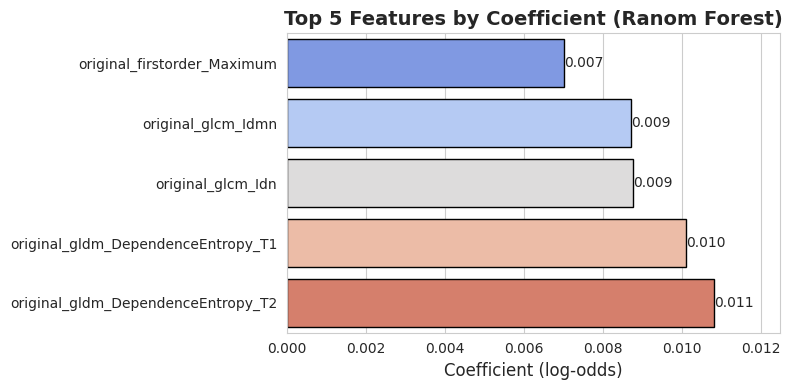

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 5
top_df = feat_importance.head(TOP_N).iloc[::-1]

plt.figure(figsize=(8, max(4, 0.3 * TOP_N)))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='coefficient',
    y='feature',
    data=top_df,
    palette='coolwarm',
    edgecolor='black'
)


for i, coef in enumerate(top_df['coefficient']):
    ax.text(coef, i, f"{coef:.3f}", va='center', fontsize=10,
            ha='left' if coef >= 0 else 'right')

ax.set_xlabel("Coefficient (log-odds)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Coefficient (Ranom Forest)", fontsize=14, weight='bold')

xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin - 0.1*abs(xmin), xmax + 0.1*abs(xmax))

plt.tight_layout()
plt.savefig("top_features_coef_RF_reg.png", dpi=600)
plt.show()

#### Feature permutation importance

In [51]:
from sklearn.inspection import permutation_importance

X_test_scaled = scaler_final.transform(X_test_df.values)
r = permutation_importance(clf_final, X_test_scaled, y_test,
                           scoring='roc_auc', n_repeats=10, random_state=RND, n_jobs=-1)

feat_importance_perm = pd.DataFrame({
    'feature': X_test_df.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values('importance_mean', ascending=False)

feat_importance_perm.to_csv("feature_importance_RF_permutation.csv", index=False)
print(feat_importance_perm.head(10))

                                     feature  importance_mean  importance_std
14              original_firstorder_Skewness         0.003901        0.000761
31                        original_glcm_Imc1         0.003084        0.000782
29                        original_glcm_Idmn         0.002993        0.001288
135       original_gldm_DependenceEntropy_T1         0.002456        0.002038
20                original_glcm_ClusterShade         0.002124        0.000896
30                         original_glcm_Idn         0.001900        0.001487
138      original_gldm_DependenceVariance_T1         0.001717        0.000679
79   original_glszm_LowGrayLevelZoneEmphasis         0.001704        0.000776
6                original_firstorder_Maximum         0.001680        0.000658
173  original_glszm_SizeZoneNonUniformity_T1         0.001545        0.001134


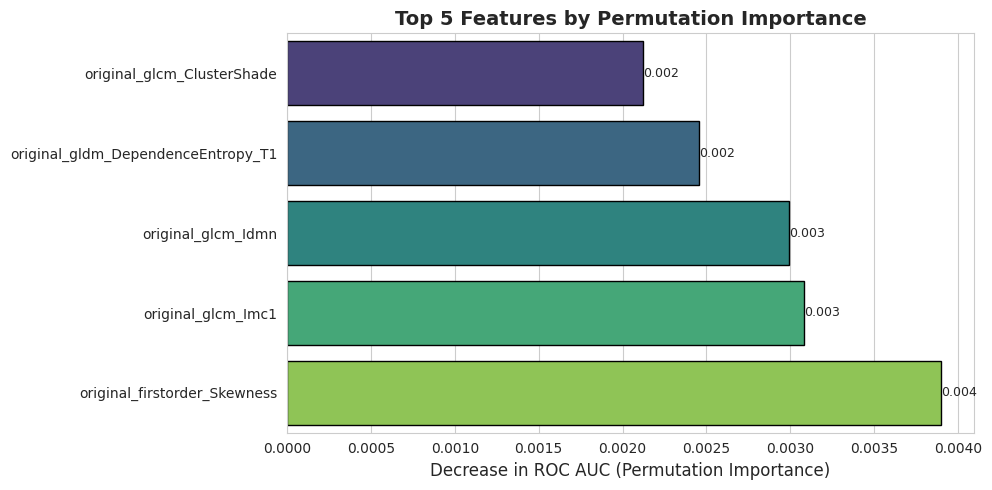

In [52]:
TOP_N = 5
top_perm_plot = feat_importance_perm.head(TOP_N).iloc[::-1]

plt.figure(figsize=(10, max(5, 0.3 * TOP_N)))
sns.set_style("whitegrid")


ax = sns.barplot(
    x='importance_mean',
    y='feature',
    data=top_perm_plot,
    palette='viridis',
    edgecolor='black',
    ci=None
)

for i, (value) in enumerate(top_perm_plot['importance_mean']):
    ax.text(value, i, f"{value:.3f}", va='center', fontsize=9)

ax.set_xlabel("Decrease in ROC AUC (Permutation Importance)", fontsize=12)
ax.set_ylabel("")
ax.set_title(f"Top {TOP_N} Features by Permutation Importance", fontsize=14, weight='bold')

plt.tight_layout()
plt.savefig("top_features_perm_imp_RF.png", dpi=600)
plt.show()

#### ROC AUC

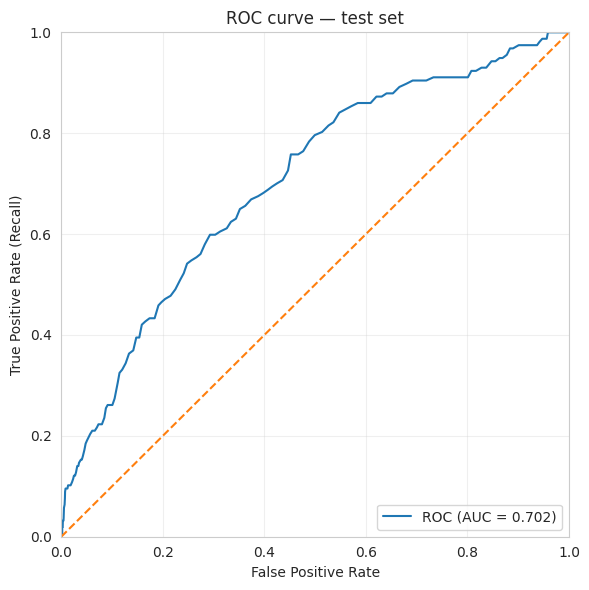

In [53]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GroupKFold
from sklearn.base import clone

probs_test = best_model.predict_proba(X_test_df.values)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve — test set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("roc_test_set_RF.png", dpi=600)
plt.show()

## Comparison

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_file = 'model_comparison_results.csv'
df = pd.read_csv(csv_file)


df

Model                                     Best CV params  \
0  Logistic Regression                          {'C':0.01,'penalty':'l2'}   
1         SVM (linear)       {'C':0.01,'kernel':'linear','gamma':'scale'}   
2                  KNN      {'n_neighbors':50,'weights':'distance','p':2}   
3        Random Forest  {'n_estimators':200,'criterion':'entropy','max...   
4    Gradient Boosting  {'n_estimators':300,'max_depth':3,'learning_ra...   
5              XGBoost  {'n_estimators':100,'max_depth':3,'learning_ra...   

   CV avg_fp  CV avg_rec_region  CV mean threshold  Test TP  Test FP  Test FN  \
0      885.6             0.9058              0.354      142     1988       15   
1      893.6             0.9217              0.330      141     2042       16   
2      920.2             0.8623              0.416      118     1867       39   
3      915.8             0.9061              0.362      137     1992       20   
4      986.2             0.9068              0.318      118     1913       39   
5      978.8             0.9071              0.284      136     2199       21   

   Test TN  Precision  Recall (region)     F1  Specificity  \
0     1221      0.067            0.904  0.124        0.380   
1     1167      0.065            0.898  0.121        0.364   
2     1342      0.059            0.752  0.110        0.418   
3     1217      0.064            0.873  0.120        0.379   
4     1296      0.058            0.752  0.108        0.404   
5     1010      0.058            0.866  0.109        0.315   

   Patient recall (strict)  Patient FN (strict)  AUC (test)  
0                    0.941                    3       0.727  
1                    0.922                    4       0.724  
2                    0.922                    4       0.629  
3                    0.922                    4       0.702  
4                    0.863                    7       0.650  
5                    0.922                    4       0.701

/tmp/ipython-input-301224975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=palette, ax=ax, width=0.6)
/tmp/ipython-input-301224975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=palette, ax=ax, width=0.6)
/tmp/ipython-input-301224975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=palette, ax=ax, width=0.6)
/tmp/ipython-input-301224975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

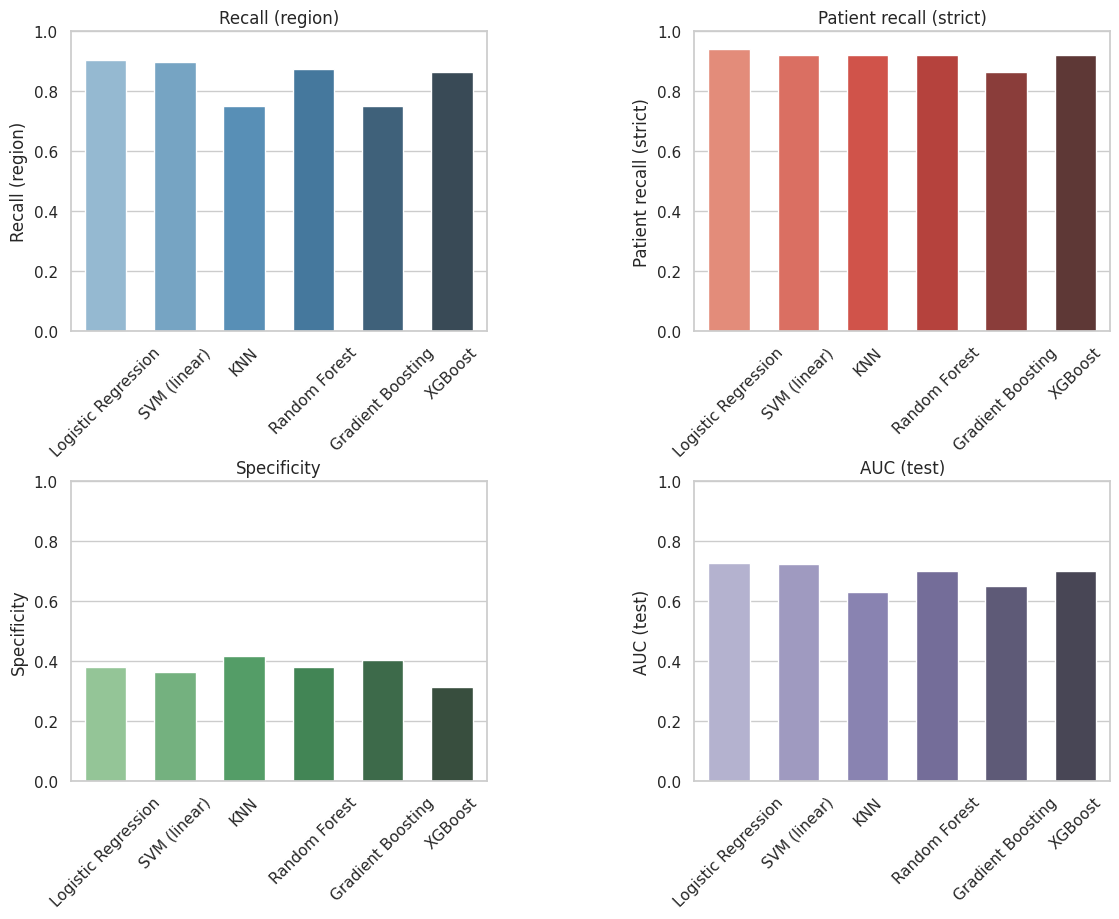

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12,10))

metrics = ["Recall (region)", "Patient recall (strict)", "Specificity", "AUC (test)"]
palettes = ["Blues_d", "Reds_d", "Greens_d", "Purples_d"]

for ax, metric, palette in zip(axes.flatten(), metrics, palettes):
    sns.barplot(x="Model", y=metric, data=df, palette=palette, ax=ax, width=0.6)
    ax.set_ylim(0, 1)
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)


plt.tight_layout(pad=3.0)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

In [ ]:
metrics = ["Recall (region)", "Patient recall (strict)", "Specificity", "AUC (test)"]
palettes = ["Blues_d", "Reds_d", "Greens_d", "Purples_d"]

for metric, palette in zip(metrics, palettes):
    plt.figure(figsize=(6,4))
    sns.barplot(x="Model", y=metric, data=df, palette=palette, width=0.6)
    plt.ylim(0,1)
    plt.xticks(rotation=30)
    plt.xlabel("")
    plt.title(metric)
    plt.tight_layout()
    plt.savefig(f"{metric}.png", dpi=600)
    plt.close()

/tmp/ipython-input-854621988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=palette, width=0.6)
/tmp/ipython-input-854621988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=palette, width=0.6)
/tmp/ipython-input-854621988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=palette, width=0.6)
/tmp/ipython-input-854621988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

### Plot important features

Saved per-feature stats to top8_features_univariate_stats.csv
                                        feature  n_healthy  n_fcd  \
0       original_glszm_LowGrayLevelZoneEmphasis      10660    428   
1  original_glszm_SmallAreaLowGrayLevelEmphasis      10660    428   
2                             original_glcm_MCC      10660    428   
3            original_gldm_DependenceEntropy_T2      10660    428   
4                    original_ngtdm_Strength_T2      10660    428   
5              original_gldm_DependenceVariance      10660    428   
6      original_glrlm_RunLengthNonUniformity_T1      10660    428   
7                   original_firstorder_Maximum      10660    428   

   median_healthy   median_fcd       p_value   p_value_adj      r_rb  \
0        0.022747     0.045026  8.658386e-08  1.385342e-07  0.152360   
1        0.013333     0.022298  1.451601e-06  1.935469e-06  0.137130   
2        0.665074     0.701686  5.084535e-10  1.355876e-09  0.176941   
3        7.157134     7.1797

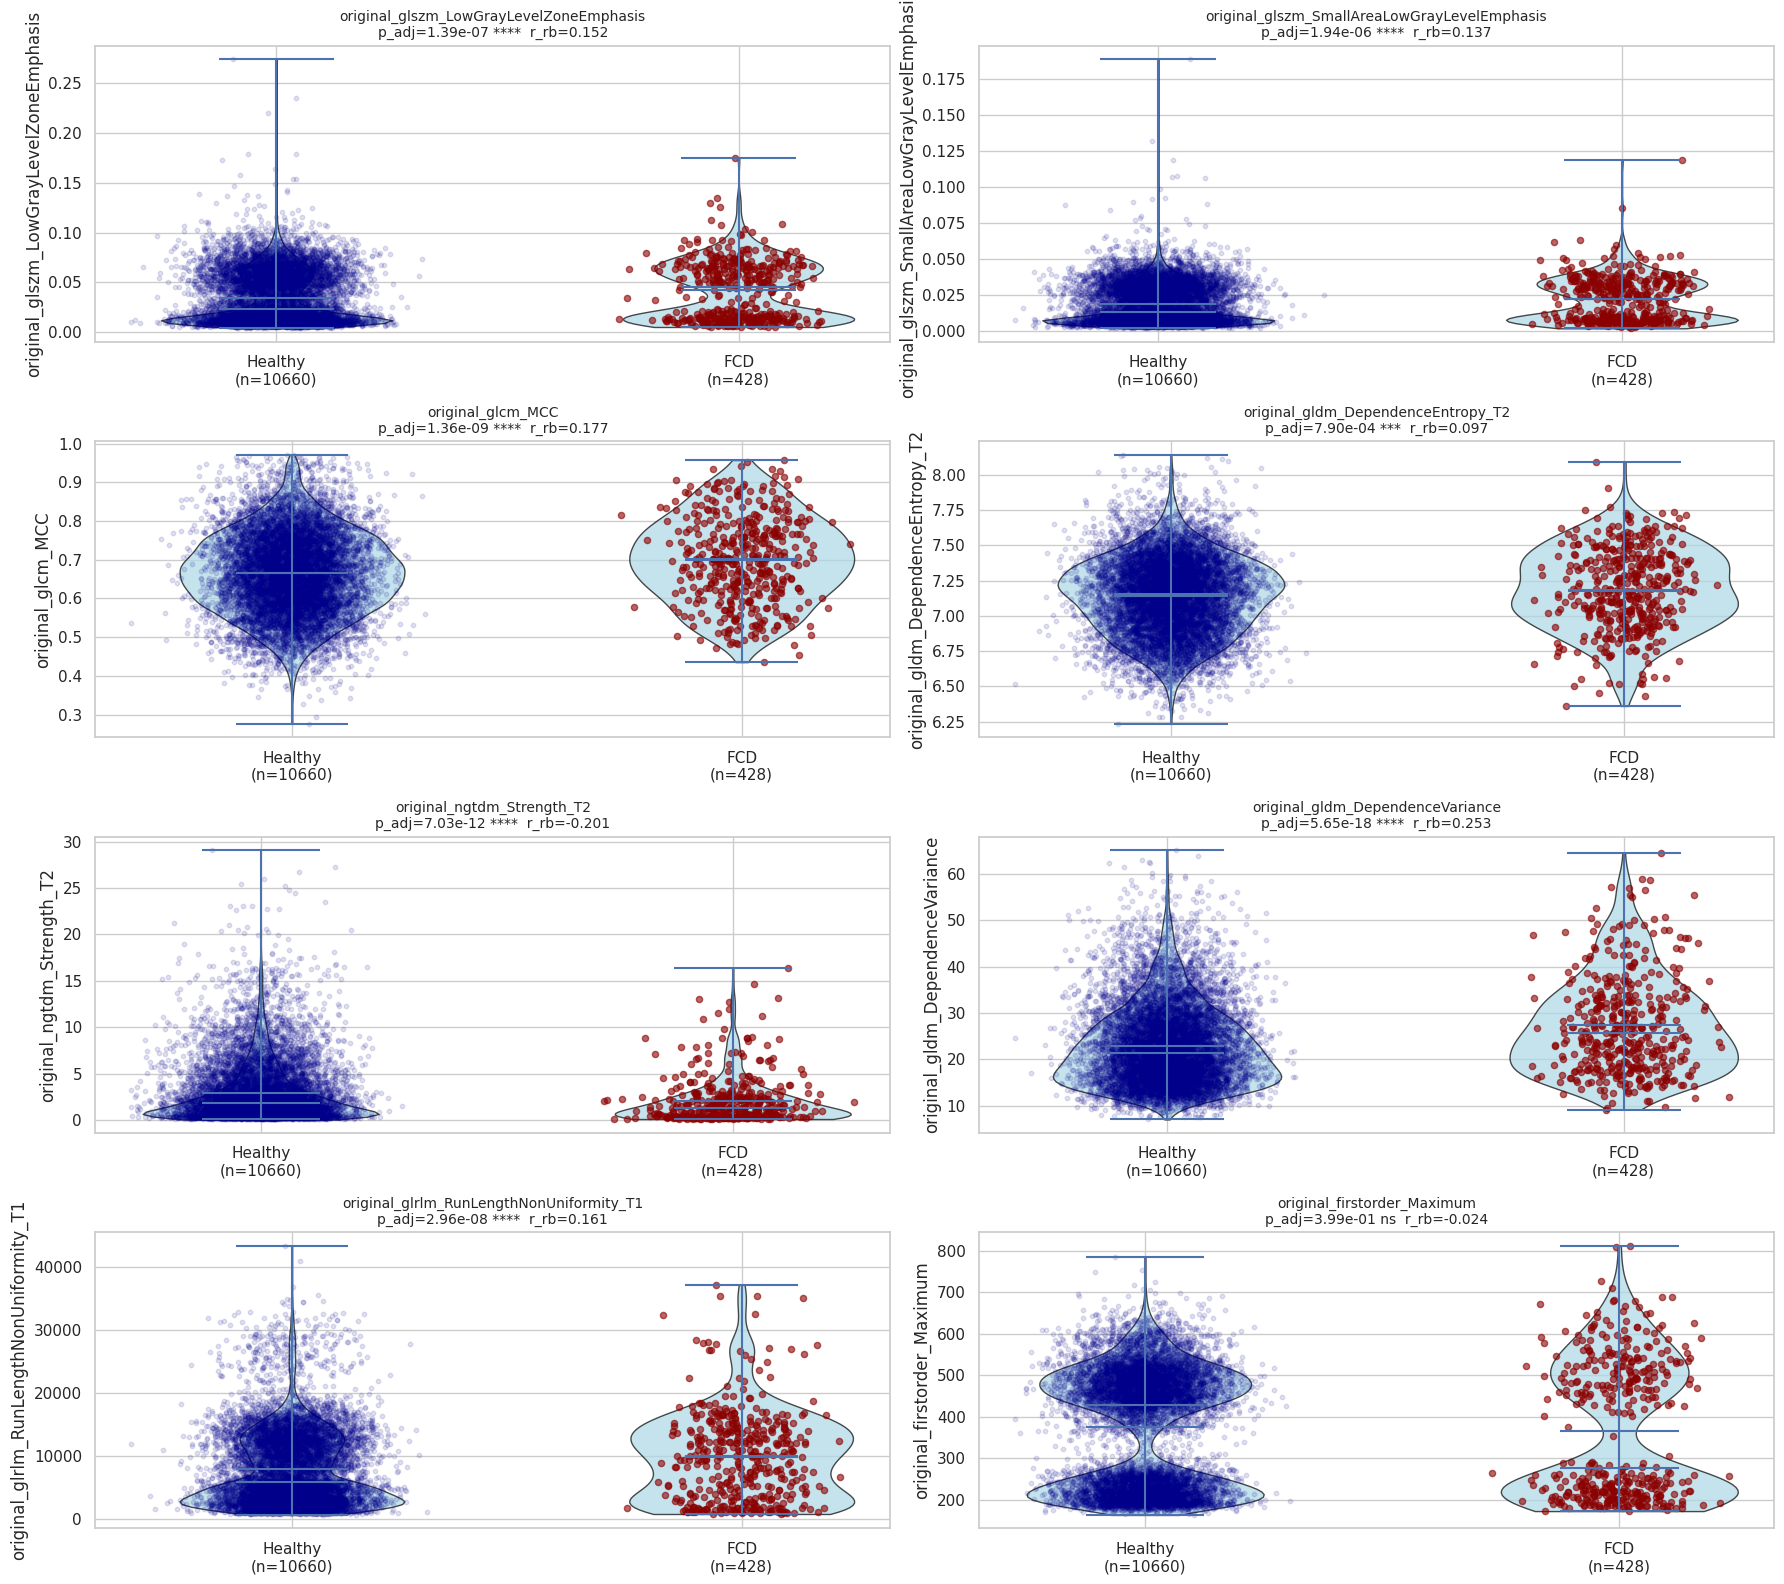

Saved figure to top8_radiomics_features_violin_plots.png


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# --- CONFIG ---
features = [
    "original_glszm_LowGrayLevelZoneEmphasis",
    "original_glszm_SmallAreaLowGrayLevelEmphasis",
    "original_glcm_MCC",
    "original_gldm_DependenceEntropy_T2",
    "original_ngtdm_Strength_T2",
    "original_gldm_DependenceVariance",
    "original_glrlm_RunLengthNonUniformity_T1",
    "original_firstorder_Maximum"
]
label_col = "label"   # 0 = healthy, 1 = FCD
out_fig = "top8_radiomics_features_violin_plots.png"
dpi = 600
figsize = (18, 16)
random_seed = 42
# ---------------

np.random.seed(random_seed)
sns.set(style="whitegrid")

# sanity checks
missing = [f for f in features if f not in df.columns]
if missing:
    raise ValueError(f"The following features are missing in df: {missing}")
if label_col not in df.columns:
    raise ValueError(f"Label column '{label_col}' not found in df.")

# compute univariate stats
rows = []
pvals = []
for feat in features:
    group_h = pd.to_numeric(df.loc[df[label_col] == 0, feat], errors='coerce').dropna()
    group_f = pd.to_numeric(df.loc[df[label_col] == 1, feat], errors='coerce').dropna()
    n_h, n_f = len(group_h), len(group_f)
    # skip if insufficient data
    if n_h == 0 or n_f == 0:
        rows.append({
            'feature': feat,
            'n_healthy': n_h,
            'n_fcd': n_f,
            'median_healthy': np.nan,
            'median_fcd': np.nan,
            'p_value': np.nan,
            'U': np.nan,
            'r_rb': np.nan
        })
        pvals.append(np.nan)
        continue

    # Mann-Whitney U:
    U_res = mannwhitneyu(group_f, group_h, alternative='two-sided')
    U = float(U_res.statistic)
    p = float(U_res.pvalue)
    # rank-biserial effect size: r_rb = (2*U)/(n1*n2) - 1, with U from (group_f vs group_h)
    r_rb = (2.0 * U) / (n_f * n_h) - 1.0

    rows.append({
        'feature': feat,
        'n_healthy': n_h,
        'n_fcd': n_f,
        'median_healthy': float(np.median(group_h)),
        'median_fcd': float(np.median(group_f)),
        'p_value': p,
        'U': U,
        'r_rb': r_rb
    })
    pvals.append(p)

# FDR correction across features
pvals_arr = np.array([pv if not np.isnan(pv) else 1.0 for pv in pvals])
rej, pvals_adj, _, _ = multipletests(pvals_arr, method='fdr_bh')

for i, feat in enumerate(features):
    rows[i]['p_value_adj'] = float(pvals_adj[i])
    rows[i]['significant_fdr'] = bool(rej[i])

stats_df = pd.DataFrame(rows)

def sigstars(p):
    if np.isnan(p):
        return ""
    if p < 1e-4:
        return "****"
    if p < 1e-3:
        return "***"
    if p < 1e-2:
        return "**"
    if p < 0.05:
        return "*"
    return "ns"

stats_df['sig_level_str'] = stats_df['p_value_adj'].apply(sigstars)

stats_df.to_csv("top8_features_univariate_stats.csv", index=False)
print(stats_df[['feature','n_healthy','n_fcd','median_healthy','median_fcd','p_value','p_value_adj','r_rb','sig_level_str']])

# --- Plotting: 4x2 grid ---
n = len(features)
ncols = 2
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
axes = axes.ravel()

for i, feat in enumerate(features):
    ax = axes[i]
    g0 = pd.to_numeric(df.loc[df[label_col] == 0, feat], errors='coerce').dropna()
    g1 = pd.to_numeric(df.loc[df[label_col] == 1, feat], errors='coerce').dropna()

    # violin
    violin = ax.violinplot([g0.values, g1.values], positions=[1,2], showmeans=True, showmedians=True)
    for pc in violin['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    # jittered points
    x0 = np.random.normal(1, 0.08, size=len(g0))
    x1 = np.random.normal(2, 0.08, size=len(g1))
    ax.scatter(x0, g0, color='darkblue', alpha=0.12, s=10)
    ax.scatter(x1, g1, color='darkred', alpha=0.6, s=20)

    ax.set_xticks([1,2])
    ax.set_xticklabels([f'Healthy\n(n={len(g0)})', f'FCD\n(n={len(g1)})'])
    ax.set_ylabel(feat)

    row = stats_df[stats_df['feature'] == feat].iloc[0]
    title = (f"{feat}\n"
             f"p_adj={row['p_value_adj']:.2e} {row['sig_level_str']}  "
             f"r_rb={row['r_rb']:.3f}")
    ax.set_title(title, fontsize=10)

# remove extra axes
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(out_fig, dpi=dpi, bbox_inches='tight')
plt.show()

